# Projecting the growth of OA articles and views: a large scale analysis




**Heather Piwowar, Jason Priem, Richard Orr**  (order tbd)   
_Our Research (team@ourresearch.org)_

First published: September 23, 2019


## 1. Introduction


The adoption of [open access (OA)](https://en.wikipedia.org/wiki/Open_access) publishing is changing scholarly communication. Predicting the future prevalence of OA is crucial for many stakeholders making decisions now, including:

-   libraries deciding which journals to subscribe to and how much they should pay

-   institutions and funders deciding what mandates they should adopt, and the implications of existing mandates

-   scholarly publishers deciding when to flip their business models to OA

-   scholarly societies deciding how best to serve their members.

Despite how useful OA prediction would be, only a few studies have made an attempt to empirically predict open access rates. Lewis (2012) extrapolated the rate at which [gold OA](https://en.wikipedia.org/wiki/Open_access#Gold_OA) would replace subscription-based publishing using a simple log linear extrapolation of gold vs subscription market share. Antelman (2017) used one empirically-derived growth rate for [green OA](https://en.wikipedia.org/wiki/Open_access#Green_OA) and another for all other kinds of OA combined. Both of these studies are based on data collected before 2012, and rely on relatively simple models. Moreover, these studies predict the number of papers that are OA. While this number is important, it is arguably less meaningful than the number of views that are OA, since this latter number describes the prevalence of OA as experienced by actual readers.

This paper aims to address this gap in the literature. In it, we build a detailed model using data extrapolated from large and up-to-date Unpaywall dataset (https://unpaywall.org/).  We use the model to predict the number of articles that will be OA (including gold, green, hybrid, and bronze OA) over the next five years, and also use data from the Unpaywall browser add-on (https://unpaywall.org/products/extension) to predict the proportion of scholarly article views that will lead readers to OA articles over time.

This paper aims to provide models of OA growth, taking the following complexities into account:

-   some forms of OA include a delay between when a paper is first published and when it is first freely available

-   different forms of open access are being adopted at different rates

-   wide-sweeping policy changes, technical improvements, or cultural changes may cause disruptions in the growth rates of OA in the future


## 2. Data

The data in this analysis comes from two sources: (1) the Unpaywall dataset and (2) the access logs of the Unpaywall web browser extension.

<a id="section-oa-vocab"></a>
### 2.1 OA type: the Unpaywall dataset of OA availability 

Predicting levels of open access publication in the future requires detailed, accurate, timely data.. This study uses the [Unpaywall](https://unpaywall.org/) dataset to provide this data.. Unpaywall is an open source application that  links every research article that has been assigned a Crossref DOI (more than 100 million in total) to the OA URLs where the paper can be read for free. It  is built and maintained by Our Research (formerly Impactstor), a US-based nonprofit organization. Unpaywall gathers data gathered from over 50,000 journals and open-access repositories from all over the world. The full Unpaywall dataset is freely, publicly available (see details: <https://unpaywall.org/user-guides/research>).

Our definitions of OA type (gold, green, hybrid, bronze, closed) are described in Piwowar et al. (2018). To facilitate prediction, for the purpose of this analysis we subdivided bronze OA into immediate and delayed OA. In summary, these definitions are:

-   **Gold:** published in a fully-OA journal
-   **Hybrid:** published in a toll-access journal, available on the publisher site, with an OA license
-   **Bronze:** published in a toll-access journal, available on the publisher site, without an OA license
    -   **Immediate Bronze:** available as Bronze OA immediately upon publication
    -   **Delayed Bronze:** available as Bronze OA after an embargo period
-   **Green:** published in a toll-access journal and the only fulltext copy available is in an OA repository
-   **Closed:** everything else

This analysis uses all articles with a Crossref article type of "journal-article" published between 1950 and the date of the analysis ({{print datetime.datetime.now().isoformat()[0:10]}}), which is 71 million articles.  

### 2.2 Article views: access logs of the Unpaywall web browser extension
{{ print section("2.2", "Article views: access logs of the Unpaywall web browser extension") }}


Predicting the open access pattern of usage requests requires knowing the relative usage demands of papers based on their age and subject matter. This study has extracted these pageview patterns from the usage logs of the [Unpaywall browser extension](https://unpaywall.org/products/extension) for Chrome and Firefox.

This extension is an open-source tool made by the same non-profit as the Unpaywall dataset described above, with the goal of helping people conveniently find free copies of research papers directly from their web browser. The extension has more than 200,000 active users and has received more than 50 million access requests between August 2018 and August 2019. Because readership data is private and potentially sensitive, we are not releasing the Unpaywall usage logs along with the other datasets behind this paper.


*TODO: add more about strengths and weaknesses of this data. make a case for why it's representative. add the IP address graphs.  num events, num journals, num countries, etc.*

## 3. Approach



The goal of this analysis is to predict two aspects of OA growth:
1. Growth in OA articles
2. Growth in OA article views

### 3.1 Overview 


To start, we display the growth of OA articles heretofore using a very simple approach: categorize previously-published articles by OA type, then for each group plot the count of articles by publication year.  Combining these curves together give us relative growth in articles by OA type, by year of publication.  This approach and its results are described in Section 4.2.

Next, we examine the growth in OA articles *by date of observation*, rather than by date of publication.  This is a more difficult analysis than the first, and requires us to calculate the OA lag between publication and availability for different types of OA.  Once we have the pattern of OA availability by year, we forecast the OA availability of future years by assuming that it will have the same overall pattern as previous years -- the papers that will be made available next year will have the same age distribution as the papers that were made available last year.  We do allow the absolute number of papers to increase year-over-year: we estimate the future growth multiplier by extrapolating the height of past availability curves.  This analysis is presented in Section 4.3.

Third, we turn to predicting the growth of OA article views -- what proportion of what is read is available OA, and how will this change in the future?  The Unpaywall browser extension logs give us a baseline of what is read right now.  By assuming that reading patterns remain relatively unchanged over time (specifically the probability that a reader wants to read a paper given its age and OA type), we use the estimates we made in Section 4.3 to calculate the relative number of views by OA type in the past and the future.  This is described in Section 4.4 and Supplementary Information.

Finally, we look at the impact of including a disruptive change into our models, in this case the growth of bioRxiv.  Analysis and results are in Section 4.5.

### 3.2 Glossary

In addition to the OA types defined in [Section 2](#section-oa-vocab), we define additional terms as we use them in this paper, in approximate order they are discussed:

- **Date of publication**: the date an article is published in a journal
- **Embargo**: the delay that some toll-access journals require between date of publication and when an article can be made Green or Delayed Bronze OA
- **Self-archiving**: when an author posts their article in an OA repository
- **OA type**: the OA classification of an article, as defined in [Section 2](#section-oa-vocab).  The OA type of an article may change over time (from Closed to Delayed Bronze OA, or from Closed to Green OA) because of embargos and other self-archiving delays
- **Date first available OA**: the date an article first becomes an OA type other than "Closed"
- **OA lag**: the length of time between an article's Date of Publication and its Date First Available OA
<pre></pre>
- **OA assessment**: the determination of the OA type of an article at a given point in time
- **Date of observation**: the date at which we make an OA assessment
- **Snapshot date of OA assessment**: the point in time for which we make an OA assessment for an article or group of articles
- **Snapshot age** of an article: the length of time between the date of a snapshot and the article's date of publication
<pre></pre>
- **View**: someone on the internet visited the publisher webpage of an article, presumably with the hope of reading the article
- **Date of view**: the date of the view
- **View age** of an article: the length of time between an article's date of publication and the date of a view
<pre></pre>
- **Articles by age curve**: for a given snapshot, the plot of snapshot age (in years) on the x-axis and number of articles published of that snapshot age on the y-axis
- **Views by age curve**: the plot of view age (in years) on the x-axis and number of views received by articles of that view age on the y-axis
- **Views per article by age curve**: the plot of view or snapshot age (in years) on the x-axis and number of views per article (by views of that view age and articles of that snapshot age) on the y-axis
- **Views per year curve**:  the plot of year on the x-axis and the number of views estimated to have been made that year on the y-axis

## 4. Methods and Results

### 4.1 Analysis

The analysis was implemented as an executable python Jupyter notebook using the pandas, scipy, matplotlib, and sqlalchemy libraries. See the [Data and code availability section](#Data-and-code-availability) below for links to the analysis code.

*---- delete the text between these lines in the final paper ----*

#### Code: Initialization

See notebook.

In [2]:
%%capture --no-stderr --no-stdout --no-display

# hidden: code to import libraries, set up database connection, other initialization
import warnings
warnings.filterwarnings('ignore')

import os
import sys
import datetime
import pandas as pd
import numpy as np
import scipy
from scipy import signal
from scipy.optimize import curve_fit
from scipy.stats.distributions import t
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap
import seaborn as sns
from sqlalchemy import create_engine
import sqlalchemy
import psycopg2
from datetime import timedelta
from IPython.display import display, HTML, Markdown
import cache_magic
from tabulate import tabulate

# our database connection
redshift_engine = create_engine(os.getenv("DATABASE_URL_REDSHIFT"))

# graph style
sns.set(style="ticks")

# long print, wrap
pd.set_option('display.expand_frame_repr', False)

# read from file if available, else from db and save it in a file for next time
# will also help have data files ready for archiving in zenodo 
def read_from_file_or_db(varname, query, skip_cache=False):
    filename = "data/{}.csv".format(varname)
    my_dataframe = pd.DataFrame()
    try:
        if not skip_cache:
            my_dataframe = pd.read_csv(filename)
    except IOError:
        pass
    if my_dataframe.empty:
        global redshift_engine
        my_dataframe = pd.read_sql_query(sqlalchemy.text(query), redshift_engine)
        my_dataframe.to_csv(filename, index=False)  # cache for the future

    return my_dataframe.copy()


# make figure captions work.  use like this: 
# make a code cell, and include
#   register_new_figure("my-figure-anchor-name") 
# before you want to refer to a figure.  This is where the link will go to.
# and then in text markdown to refer to the figure
#   {{figure_link("my-figure-anchor-name")}}

global figure_so_far
global figure_numbers
figures_so_far = 1
figure_numbers = {}

# inspired by https://github.com/l-althueser/nbindex-jupyter/blob/master/nbindex/numbered.py
def leave_figure_anchor(anchor_text):
    key  = u"figure-{}".format(anchor_text)
    """
    Adds numbered named object HTML anchors. Link to them in MarkDown using: [to keyword 1](#keyword-1)
    """
    return display(HTML('''<div id="%s"></div>
    <script>
    var key = "%s"
    $("div").each(function(i){
        if (this.id === key){
            this.innerHTML = '<a name="' + key + '"></a>';
        }
    });
    </script>
    ''' % (key,key)))

def register_new_figure(anchor_text):
    global figures_so_far
    global figure_numbers
    if not anchor_text in figure_numbers:
        figure_numbers[anchor_text] = figures_so_far
        leave_figure_anchor(anchor_text)
        figures_so_far += 1
    return figure_numbers[anchor_text]

def figure_link(anchor_text=None):
    if anchor_text:
        template = "[Figure {figure_number}](#figure-{anchor_text})"
        my_return = template.format(figure_number=figure_numbers[anchor_text], 
                                    anchor_text=anchor_text)
    else:
        my_return = figure_numbers
    return my_return
    

# set up colors
oa_status_order = ["green", "gold", "hybrid", "bronze", "closed"]
oa_status_colors = ["green", "gold", "orange", "brown", "grey"]
oa_color_lookup = pd.DataFrame(data = {"name": oa_status_order, "color": oa_status_colors, "order": range(0, len(oa_status_order))})
my_cmap = sns.color_palette(oa_status_colors)

graph_type_order = ["green", "gold", "hybrid", "immediate_bronze", "delayed_bronze", "closed"]
graph_type_colors = ["green", "gold", "orange", "brown", "salmon", "gray"]
graph_type_lookup = pd.DataFrame(data = {"name": graph_type_order, "color": graph_type_colors, "order": range(0, len(graph_type_order))})
my_cmap_graph_type = sns.color_palette(graph_type_colors)

graph_type_colors_plus_biorxiv = ["lawngreen"] + graph_type_colors
graph_type_order_plus_biorxiv = ["biorxiv"] + graph_type_order
plus_biorxiv_labels = [
    "green (biorxiv)",
    "green (other)",
    "gold",
    "hybrid",
    "bronze (immediate)",
    "bronze (delayed)",
    "closed"
]
graph_type_plus_biorxiv_lookup = pd.DataFrame(data = {"name": graph_type_order_plus_biorxiv, "color": graph_type_colors_plus_biorxiv, "order": range(0, len(graph_type_colors_plus_biorxiv))})
my_cmap_graph_type_plus_biorxiv = sns.color_palette(graph_type_colors_plus_biorxiv)


%cache magic is now registered in ipython


#### Code: Functions

See notebook.

In [3]:
%%capture --no-stderr --no-stdout --no-display

def get_data_extrapolated(graph_type, data_type=False, extrap="linear", now_delta_years=0, cumulative=True):
    
    calc_min_year = 1951
    display_min_year = 2010
    now_year = 2019 - now_delta_years
    max_year = 2024

    min_y = 0
    max_y = None
    color = graph_type
    if "bronze" in graph_type:
        color = "bronze"
                        
    if isinstance(data_type, pd.DataFrame):
        df_this_color = data_type.loc[(data_type.graph_type==graph_type)]
    elif data_type == "basic":
        df_this_color = articles_by_color_by_year.loc[(articles_by_color_by_year.oa_status==color)]
    else:
        df_this_color = unpaywall_graph_type.loc[(unpaywall_graph_type.oa_status==graph_type)]

    totals = pd.DataFrame()
    for i, prediction_year in enumerate(range(calc_min_year, now_year)):

        if "published_year" in df_this_color.columns:
            if cumulative:
                df_this_plot = df_this_color.loc[(df_this_color["published_year"] <= prediction_year)]
            else:
                df_this_plot = df_this_color.loc[(df_this_color["published_year"] == prediction_year)]
        else:
            df_this_plot = df_this_color
        y = [a for a in df_this_plot["num_articles"] if not np.isnan(a)]
        prediction_y = sum(y)

        totals = totals.append(pd.DataFrame(data={"prediction_year": [prediction_year], 
                                             "num_articles": [prediction_y]}))

      
    x = totals["prediction_year"]
    y = totals["num_articles"]
    xnew = np.arange(now_year-1, max_year+1, 1)
    if extrap=="linear":
        f = scipy.interpolate.interp1d(x, y, fill_value="extrapolate", kind="linear")
        ynew = f(xnew)
    else:
        f = scipy.interpolate.interp1d(x, np.log10(y), fill_value="extrapolate", kind="linear")
        ynew = 10 ** f(xnew)
    
    new_data = pd.DataFrame({"color":color, "graph_type": graph_type, "x":np.append(x[:-1], xnew), "y":np.append(y[:-1], ynew)})

    return new_data


def graph_data_extrapolated(graph_type, data_type=False, extrap="linear", now_delta_years=0, ax=None, cumulative=True):
    calc_min_year = 1951
    display_min_year = 2000
    now_year = 2019 - now_delta_years
    max_year = 2024

    min_y = 0
    max_y = None
    color = graph_type
    if "bronze" in graph_type:
        color = "bronze"
    
    new_data = get_data_extrapolated(graph_type, data_type, extrap, now_delta_years, cumulative)

    year_range = range(display_min_year, now_year)
    
    if not isinstance(data_type, pd.DataFrame) and data_type == "simple":
        my_color_lookup = oa_color_lookup.loc[oa_color_lookup["name"]==color]
    else:
        my_color_lookup = graph_type_lookup.loc[graph_type_lookup["name"]==graph_type]
    
    if not ax:
        fig = plt.figure()
        ax = plt.subplot(111)

    if not max_y:
        max_y = 5 * max(new_data["y"])

    df_actual = new_data.loc[new_data["x"] < now_year]
    x = [int(a) for a in df_actual["x"]]
    y = [int(a) for a in df_actual["y"]]
    df_future = new_data.loc[new_data["x"] >= now_year]
    xnew = [int(a) for a in df_future["x"]]
    ynew = [int(a) for a in df_future["y"]]

    ax.plot(x, y, 'o', color="black")
    ax.fill_between(x, y, color=my_color_lookup["color"])

    ax.plot(xnew, ynew, 'o', color="black", alpha=0.3)
    ax.fill_between(xnew, ynew, color=my_color_lookup["color"], alpha=0.3)
    if cumulative:
        ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.0f}'.format(y/(1000*1000.0))))
        ax.set_ylabel("articles (millions)")
        ax.set_xlabel("year")
    else:
        ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.1f}'.format(y/(1000*1000.0))))
        ax.set_ylabel("articles (millions)")
        ax.set_xlabel("year of publication")
    ax.set_xlim(min(year_range), max_year)
    ax.set_title(graph_type);

    return new_data

In [4]:
%%capture --no-stderr --no-stdout --no-display

# graph!  :)

def graph_available_papers_at_year_of_availability(graph_type, now_delta_years=0, ax=None):
    calc_min_year = 1951
    display_min_year = 2010
    now_year = 2018 - now_delta_years
    max_year = 2024

    color = graph_type
    if "bronze" in graph_type:
        color = "bronze"

    if graph_type == "biorxiv":
        my_color_lookup = {"color": "limegreen"}
    else:
        my_color_lookup = graph_type_lookup.loc[graph_type_lookup["name"]==graph_type]        
        
    all_papers_per_year = get_papers_by_availability_year_including_future(graph_type, calc_min_year, max_year)

    most_recent_year = all_papers_per_year.loc[all_papers_per_year.article_years_from_availability == 0]
    
    x = [int(a) for a in most_recent_year.loc[most_recent_year.prediction_year <= now_year]["prediction_year"]]
    xnew = [int(a) for a in most_recent_year.loc[most_recent_year.prediction_year > now_year]["prediction_year"]]
    y = [int(a) for a in most_recent_year.loc[most_recent_year.prediction_year <= now_year]["num_articles"]]
    ynew = [int(a) for a in most_recent_year.loc[most_recent_year.prediction_year > now_year]["num_articles"]]

    year_range = range(display_min_year, now_year)
    if not ax:
        fig = plt.figure()
        ax = plt.subplot(111)

    max_y = 1.2 * max(ynew)

    ax.plot(x, y, 'o', color="black")
    ax.fill_between(x, y, color=my_color_lookup["color"])

    ax.plot(xnew, ynew, 'o', color="black", alpha=0.3)
    ax.fill_between(xnew, ynew, color=my_color_lookup["color"], alpha=0.3)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.2f}'.format(y/(1000*1000.0))))
    ax.set_ylabel("total papers (millions)")

    ax.set_xlim(min(year_range), max_year)
#         ax.set_ylim(0, max_y)
    ax.set_xlabel('year of observation')
    title = plt.suptitle("OA status by observation year")
    title.set_position([.5, 1.05])
    all_papers_per_year.reset_index(inplace=True)
    return all_papers_per_year

In [5]:
%%capture --no-stderr --no-stdout --no-display

def graph_available_papers_in_observation_year_by_pubdate(graph_type, data, observation_year, ax=None):
    display_min_year = 2010
    max_year = 2024

    x = [int(a) for a in data["publication_date"]]
    y = [int(a) for a in data["num_articles"]]

    my_color_lookup = graph_type_lookup.loc[graph_type_lookup["name"]==graph_type]
    if not ax:
        fig = plt.figure()
        ax = plt.subplot(111)

    alpha = 1
#     if observation_year > 2018:
#         alpha = 0.3
    ax.bar(x, y, color=my_color_lookup["color"], alpha=alpha)

    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.1f}'.format(y/(1000*1000.0))))
    ax.set_xlim(display_min_year, max_year+1)
    max_y = 1.2 * data.num_articles.max()
    try:
        ax.set_ylim(0, max_y)
    except:
        pass
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title("{}: {}".format(graph_type, observation_year));  
#     title = plt.suptitle("Availability in {}, by publication date".format(observation_year))
#     title.set_position([.5, 1.05])
    return 



In [6]:
def get_papers_by_availability_year_including_future(graph_type, start_year, end_year):
    start_calc_year = 2009
    now_year = 2015
    offset = 0
    global final_extraps
    
    my_return = pd.DataFrame()

    for prediction_year in range(min(start_year, start_calc_year), now_year+1):        
#         print prediction_year
        papers_per_year = get_papers_by_availability_year(graph_type, prediction_year, just_this_year=False)
        papers_per_year["prediction_year"] = prediction_year
        my_return = my_return.append(papers_per_year)
        
    if end_year >= now_year:
        scale_df = final_extraps.copy()
        current_year_all = get_papers_by_availability_year(graph_type, now_year, just_this_year=False)
        now_year_new = get_papers_by_availability_year(graph_type, now_year, just_this_year=True)
        for i, prediction_year in enumerate(range(now_year+1, end_year+1)): 
            current_year_all["article_years_from_availability"] += 1 
#             print now_year_all.head()
#             print now_year_new.head()
            merged_df = current_year_all.merge(now_year_new, on="article_years_from_availability", suffixes=["_all", "_new"], how="outer")
            merged_df = merged_df.fillna(0)
#             print merged_df.head(10)
            scale = float(scale_df.loc[(scale_df.x==prediction_year)&(scale_df.graph_type==graph_type)].y) / int(scale_df.loc[(scale_df.x==now_year)&(scale_df.graph_type==graph_type)].y) 
            merged_df["num_articles"] = merged_df["num_articles_all"] + [int(scale * a) for a in merged_df["num_articles_new"]]
            merged_df["prediction_year"] = prediction_year
            current_year_all = pd.DataFrame(merged_df, columns=["num_articles", 
                                                      "article_years_from_availability", 
                                                      "prediction_year"])
            my_return = my_return.append(current_year_all)

    my_return.reset_index(inplace=True)
    return my_return

In [7]:
%%capture --no-stderr --no-stdout --no-display

# graph!  :)

def graph_views(graph_type, data=None, now_delta_years=0, ax=None):
    calc_min_year = 1951
    display_min_year = 2010
    now_year = 2018 - now_delta_years
    max_year = 2025

    color = graph_type

    if isinstance(data, pd.DataFrame):
        df_views_by_year = data
    else:
        df_views_by_year = get_predicted_views(graph_type, display_min_year, max_year)

    year_range = range(display_min_year, now_year)
    if graph_type == "biorxiv":
        my_color_lookup = {"color": "limegreen"}
    else:
        my_color_lookup = graph_type_lookup.loc[graph_type_lookup["name"]==color]
        
    if not ax:
        fig = plt.figure()
        ax = plt.subplot(111)

    
    x = [int(a) for a in df_views_by_year["observation_year"]]
    y = [int(a) for a in df_views_by_year["views"]]
    max_y = 1.2 * max(y)

    ax.scatter(x, y, marker='x', s=70, color=my_color_lookup["color"])

    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.1f}'.format(y/(1000*1000.0))))
    ax.set_ylabel("views (millions)")

    ax.set_xlim(min(year_range), max_year+1)
#         ax.set_ylim(0, max_y)
    ax.set_xlabel('year of observation')
#     title = plt.suptitle("Estimated views by access year, by OA type")
#     title.set_position([.5, 1.05])
    return df_views_by_year

In [8]:

# do calculations

def get_papers_by_availability_year(graph_type="closed", availability_year=2000, just_this_year=False):
    my_return = pd.DataFrame()
        
    if just_this_year:
        if graph_type == "closed":
            rows_published_this_year = articles_by_color_by_year.loc[articles_by_color_by_year["published_year"] == availability_year]
            total_this_year = rows_published_this_year.num_articles.sum()
            
            open_this_year = 0
            for prep_graph_type in ["gold", "hybrid", "green", "immediate_bronze", "delayed_bronze"]:
#             for prep_graph_type in ["hybrid", "green", "delayed_bronze"]:
                temp_papers = get_papers_by_availability_year(prep_graph_type, availability_year, just_this_year=False)
                temp_papers = temp_papers.loc[temp_papers.article_years_from_availability == 0]
                num_articles = temp_papers.num_articles.sum()
#                 print prep_graph_type, num_articles
                open_this_year += num_articles
            num_closed = total_this_year - open_this_year
            
            my_return = pd.DataFrame({
                "article_years_from_availability": [0],
                "num_articles": [num_closed]
            })
        else:
            prev_year_history = get_papers_by_availability_year(graph_type, availability_year-1, just_this_year=False)
            prev_year_history["article_years_from_availability"] += 1
            this_year_history = get_papers_by_availability_year(graph_type, availability_year, just_this_year=False)
            df_merged = this_year_history.merge(prev_year_history, on="article_years_from_availability", how="left")
            df_merged = df_merged.fillna(0)
            df_merged["num_articles"] = df_merged["num_articles_x"] - df_merged["num_articles_y"]
            df_merged["num_articles"][df_merged["num_articles"] < 25] = 0
            df_merged = df_merged.loc[df_merged["article_years_from_availability"] <= 10]
            my_return = pd.DataFrame({
                "article_years_from_availability": df_merged["article_years_from_availability"],
                "num_articles": df_merged["num_articles"]
            })

    else:
            
        if graph_type == "delayed_bronze":
            temp_papers = papers_after_cutoffs_after_embargo_delayed_bronze.loc[papers_after_cutoffs_after_embargo_delayed_bronze["prediction_year"]==availability_year]
            my_return = pd.DataFrame({
                "article_years_from_availability": temp_papers["article_age_years"],
                "num_articles": temp_papers["num_articles"]
            })

        elif graph_type == "green":

            my_green_oa = green_oa_with_dates_by_availability

            my_green_oa = my_green_oa.loc[my_green_oa["months_old_at_first_deposit"] >= -24]
            my_green_oa = my_green_oa.loc[my_green_oa["months_old_at_first_deposit"] <= 12*25]
            my_green_oa = my_green_oa.loc[my_green_oa["year_of_first_availability"] <= availability_year]

            my_green_oa_pivot = my_green_oa.pivot_table(
                         index='published_year', values=['num_articles'], aggfunc=np.sum)
            my_green_oa_pivot.reset_index(inplace=True)
            my_green_oa_pivot = my_green_oa_pivot.sort_values(by=["published_year"], ascending=False)
            my_green_oa_pivot["article_years_from_availability"] = [(availability_year - a) for a in my_green_oa_pivot["published_year"]]
            my_return = pd.DataFrame({
                "article_years_from_availability": my_green_oa_pivot["article_years_from_availability"],
                "num_articles": my_green_oa_pivot["num_articles"]
            })

        elif graph_type == "closed":
            my_return = pd.DataFrame()
            for i, year in enumerate(range(availability_year+1, 1990, -1)):
                closed_rows = get_papers_by_availability_year(graph_type, availability_year - i, just_this_year=True)
                closed_rows["article_years_from_availability"] = i
                my_return = my_return.append(closed_rows)
            
        elif graph_type == "immediate_bronze":
            temp_papers = articles_by_color_by_year_with_embargos.loc[(articles_by_color_by_year_with_embargos.oa_status=="bronze") &
                                                                   (articles_by_color_by_year_with_embargos["embargo"].isnull()) &
                                                                  (articles_by_color_by_year_with_embargos.published_year <= availability_year)]
#             temp_papers["article_years_from_availability"] = availability_year - temp_papers["published_year"]        
            temp_pivot = temp_papers.pivot_table(
                         index='published_year', values=['num_articles'], aggfunc=np.sum)
            temp_pivot.reset_index(inplace=True)
            my_return = pd.DataFrame({
                "article_years_from_availability": availability_year - temp_pivot.published_year,
                "num_articles": temp_pivot.num_articles
            })

        elif graph_type == "biorxiv": 
            my_return = biorxiv_growth.copy()
            my_return = my_return.loc[my_return["published_year"] <= availability_year]
            my_return["article_years_from_availability"] = availability_year - my_return["published_year"]
        else:
            temp_papers = articles_by_color_by_year.loc[(articles_by_color_by_year.oa_status==graph_type) &
                                                    (articles_by_color_by_year.published_year <= availability_year)]
            my_return = pd.DataFrame({
                "article_years_from_availability": [availability_year - a for a in temp_papers["published_year"]],
                "num_articles": temp_papers["num_articles"]
            })


    if not my_return.empty:
        my_return = pd.DataFrame(my_return, columns=["article_years_from_availability", "num_articles"])        
        my_return = my_return.sort_values(by="article_years_from_availability")

    return my_return




In [9]:

# %lprun -f get_papers_by_availability_year get_papers_by_availability_year("closed", 2001, False)
# a = get_papers_by_availability_year("closed", 2001, False)
# print a.head()

In [10]:
%%capture --no-stderr --no-stdout --no-display

def get_predicted_views_by_pubdate(graph_type, observation_year):

    views_per_article = get_views_per_article(graph_type)
           
    df_views_by_year = pd.DataFrame()
    all_papers_per_year = get_papers_by_availability_year_including_future(graph_type, observation_year, observation_year+1)
    papers_per_year = all_papers_per_year.loc[all_papers_per_year["prediction_year"] == observation_year]
    
    try:
        data_merged_clean = papers_per_year.merge(views_per_article, left_on=["article_years_from_availability"], right_on=["article_age_years"])
        data_merged_clean = data_merged_clean.sort_values("article_age_years")
#         print data_merged_clean.head()
        data_merged_clean["views"] = data_merged_clean["views_per_article"] * data_merged_clean["num_articles"]
        data_merged_clean["observation_year"] = observation_year
        data_merged_clean["publication_year"] = observation_year - data_merged_clean["article_age_years"]
        new_data = pd.DataFrame(data_merged_clean, columns=["publication_year", "views", "article_age_years", "observation_year"])
        df_views_by_year = df_views_by_year.append(new_data)
    except (ValueError, KeyError):  # happens when the year is blank
        pass
    
    return df_views_by_year

In [11]:
%%capture --no-stderr --no-stdout --no-display

def get_predicted_views(graph_type, now_delta_years=0):
#     calc_min_year = 1951
    calc_min_year = 1995
    display_min_year = 2010
    now_year = 2020 - now_delta_years
    max_year = 2024
    exponential = False

    if graph_type == "biorxiv":
        exponential = True
        
    views_per_article = get_views_per_article(graph_type)
           
    df_views_by_year = pd.DataFrame()
    
    all_papers_per_year = all_predicted_papers_future
    for prediction_year in range(calc_min_year, max_year+1):        
#     for prediction_year in range(calc_min_year, 2019):        
#     for prediction_year in range(2017, 2019):        
        papers_per_year = all_papers_per_year.loc[all_papers_per_year["prediction_year"] == prediction_year]
        papers_per_year = papers_per_year.loc[papers_per_year["graph_type"] == graph_type]
#         print views_per_article.head()
        try:
            data_merged_clean = papers_per_year.merge(views_per_article, left_on=["article_years_from_availability"], right_on=["article_age_years"])
            data_merged_clean = data_merged_clean.sort_values("article_age_years")
            win = data_merged_clean["views_per_article"] 
            sig = data_merged_clean["num_articles"]
            views_by_access_year = signal.convolve(win, sig, mode='same', method="direct")
            y = max(views_by_access_year)
            df_views_by_year = df_views_by_year.append(pd.DataFrame({"observation_year":[prediction_year], "views": [y]}))
        except (ValueError, KeyError):  # happens when the year is blank
            pass
        

    return df_views_by_year

In [12]:
%%capture --no-stderr --no-stdout --no-display

def get_papers_by_availability_year_total(availability_year):
    all_data = pd.DataFrame()
    for prep_graph_type in ["gold", "hybrid", "green", "immediate_bronze", "delayed_bronze", "closed"]:
#     for prep_graph_type in ["gold", "hybrid", "green", "immediate_bronze", "delayed_bronze"]:
        temp_papers = get_papers_by_availability_year_including_future(prep_graph_type, availability_year, availability_year+1)
        temp_papers["graph_type"] = prep_graph_type
#         print prep_graph_type
#         print "{:,.0f}".format(temp_papers.num_articles.max()), "{:,.0f}".format(temp_papers.num_articles.sum())
#         print "\n"
        all_data = all_data.append(temp_papers)
    return all_data

def get_views_per_year_total():
    all_data = pd.DataFrame()
    for prep_graph_type in ["gold", "hybrid", "green", "immediate_bronze", "delayed_bronze", "closed"]:
        temp_papers = get_views_per_year(prep_graph_type)
        temp_papers["graph_type"] = prep_graph_type
#         print prep_graph_type
#         print "{:,.0f}".format(temp_papers.num_views_per_year.max()), "{:,.0f}".format(temp_papers.num_views_per_year.sum())
#         print "\n"
        all_data = all_data.append(temp_papers)
    return all_data



def get_views_per_article_total():
    all_data = pd.DataFrame()
    for prep_graph_type in ["gold", "hybrid", "green", "immediate_bronze", "delayed_bronze", "closed"]:
        temp_papers = get_views_per_article(prep_graph_type)
#         print prep_graph_type
#         print "{:,.0f}".format(temp_papers.views_per_article.max()), "{:,.0f}".format(temp_papers.views_per_article.sum())
#         print "\n"
        temp_papers["graph_type"] = prep_graph_type
        all_data = all_data.append(temp_papers)
    return all_data


def get_predicted_views_total(observation_year):
    all_data = pd.DataFrame()
    for prep_graph_type in ["gold", "hybrid", "green", "immediate_bronze", "delayed_bronze", "closed"]:
#     for prep_graph_type in ["gold", "hybrid", "green", "immediate_bronze", "delayed_bronze"]:
        temp_papers = get_predicted_views(prep_graph_type, observation_year)
        temp_papers["graph_type"] = prep_graph_type
#         print prep_graph_type        
        all_data = all_data.append(temp_papers)
    return all_data

def get_predicted_views_by_pubdate_total(observation_year):
    all_data = pd.DataFrame()
#     for prep_graph_type in ["gold", "hybrid", "green", "immediate_bronze"]:
    for prep_graph_type in ["gold", "hybrid", "green", "immediate_bronze", "delayed_bronze", "closed"]:
        temp_papers = get_predicted_views_by_pubdate(prep_graph_type, observation_year)
        temp_papers["graph_type"] = prep_graph_type
#         print prep_graph_type
        all_data = all_data.append(temp_papers)
    return all_data


In [13]:
def get_views_per_year(graph_type):
    if graph_type == "delayed_bronze":
        views_per_year = data_usage_by_age_years.loc[(data_usage_by_age_years.oa_status=="bronze") &
                                                       (data_usage_by_age_years.delayed_or_immediate=="delayed")]
    elif graph_type == "immediate_bronze":
        views_per_year = data_usage_by_age_years.loc[(data_usage_by_age_years.oa_status=="bronze") &
                                                       (data_usage_by_age_years["delayed_or_immediate"]=="immediate")]

    else:
        views_per_year = data_usage_by_age_years.loc[(data_usage_by_age_years.oa_status==graph_type)]

    views_per_year["num_views_one_month"] = views_per_year["num_views"]  # this is just for one month
    views_per_year["num_views_per_year"] = 12.0 * views_per_year["num_views_one_month"]
    del views_per_year["num_views"]
    del views_per_year["delayed_or_immediate"]
    views_per_year = views_per_year.sort_values(by="article_age_years")
    views_per_year = views_per_year.loc[views_per_year["article_age_years"] < 15]
    
    return views_per_year     


def get_views_per_article(graph_type):
    if graph_type == "biorxiv":
        graph_type = "green"
        
    views_per_year = get_views_per_year(graph_type)
    papers_per_year = get_papers_by_availability_year(graph_type, 2018, just_this_year=False)
    papers_per_year["article_age_years"] = papers_per_year["article_years_from_availability"]
    papers_per_year = papers_per_year.loc[(papers_per_year["article_age_years"] <=15 )]

    data_merged_clean = papers_per_year.merge(views_per_year, on=["article_age_years"])        
    data_merged_clean["views_per_article"] = data_merged_clean["num_views_per_year"] / data_merged_clean["num_articles"]

    views_per_article = pd.DataFrame(data_merged_clean, columns=["article_age_years", "views_per_article"])
    views_per_article = views_per_article.sort_values(by="article_age_years")

    if graph_type=="delayed_bronze":
        # otherwise first one is too high because number articles too low in year 0 for delayed subset
        views_per_article.loc[views_per_article.article_age_years==0, ["views_per_article"]] = float(views_per_article.loc[views_per_article.article_age_years==1].views_per_article)

    return views_per_article

In [14]:
%%capture --no-stderr --no-stdout --no-display

def plot_area_and_proportion(df, color_type, start_year, end_year, divide_year, 
                             xlabel="year of publication",
                             fancy=None):
    if color_type=="simple":
        my_colors = oa_status_colors
        my_color_order = oa_status_order
        color_column = "color"
    elif color_type=="standard":
        my_colors = graph_type_colors
        my_color_order = graph_type_order
        color_column = "graph_type"
    else:
        my_colors = graph_type_colors_plus_biorxiv
        my_color_order = graph_type_order_plus_biorxiv
        color_column = "graph_type"
        
    all_data_pivot = df.pivot_table(
                 index='x', columns=color_column, values=['y'], aggfunc=np.sum)\
           .sort_index(axis=1, level=1)\
           .swaplevel(0, 1, axis=1)
    all_data_pivot.columns = all_data_pivot.columns.levels[0]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharex=True, sharey=False)
    plt.tight_layout(pad=0, w_pad=2, h_pad=1)
    plt.subplots_adjust(hspace=1)

    all_data_pivot_graph = all_data_pivot
    if fancy=="cumulative":
        all_data_pivot_graph = all_data_pivot_graph.cumsum(0)
    elif fancy=="diff":
        all_data_pivot_graph = all_data_pivot_graph.diff()
    all_data_pivot_graph = all_data_pivot_graph.loc[all_data_pivot_graph.index > 1950]
    all_data_pivot_graph = all_data_pivot_graph.loc[all_data_pivot_graph.index <= end_year]
        
    # print all_data_pivot_graph
    all_data_pivot_actual = all_data_pivot_graph.loc[all_data_pivot_graph.index <= divide_year+1]
    my_plot = all_data_pivot_actual[my_color_order].plot.area(stacked=True, color=my_colors, linewidth=.1,  ax=ax1)
    if end_year > divide_year:
        all_data_pivot_projected = all_data_pivot_graph.loc[all_data_pivot_graph.index > divide_year]
        my_plot = all_data_pivot_projected[my_color_order].plot.area(stacked=True, color=my_colors, linewidth=.1,  ax=ax1, alpha=0.6)
    ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
    ax1.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.0f}'.format(y/(1000*1000.0))))
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("articles (millions)")    
    ax1.set_xlim(start_year, end_year)
    ax1.set_ylim(0, 1.2*max(all_data_pivot_graph.sum(1)))
#     ax1.set_title("Number of papers");
    handles, labels = my_plot.get_legend_handles_labels(); my_plot.legend(reversed(handles[0:len(my_colors)]), reversed(labels[0:len(my_colors)]), loc='upper left');  # reverse to keep order consistent

    df_diff_proportional = all_data_pivot_graph.div(all_data_pivot_graph.sum(1), axis=0)
    all_data_pivot_actual = df_diff_proportional.loc[all_data_pivot_graph.index <= divide_year+1]
    my_plot = all_data_pivot_actual[my_color_order].plot.area(stacked=True, color=my_colors, linewidth=.1,  ax=ax2)
    if end_year > divide_year:
        all_data_pivot_projected = df_diff_proportional.loc[all_data_pivot_graph.index > divide_year]
        my_plot = all_data_pivot_projected[my_color_order].plot.area(stacked=True, color=my_colors, linewidth=.1,  ax=ax2, alpha=0.6)
    my_plot.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel('proportion of articles')
#     ax2.set_title("Proportion of papers");
    ax2.set_xlim(start_year, end_year)
    ax2.set_ylim(0, 1)    
    handles, labels = my_plot.get_legend_handles_labels(); my_plot.legend(reversed(handles[0:len(my_colors)]), reversed(labels[0:len(my_colors)]), loc='upper left');  # reverse to keep order consistent

    plt.tight_layout(pad=.5, w_pad=4, h_pad=2.0) 

In [15]:
# plot graphs duplicate new

def get_long_data(graph_type):
    full_range = range(1990, 2020)

    totals_bronze = pd.DataFrame()
    for i, prediction_year in enumerate(full_range):
        new_frame = get_papers_by_availability_year(graph_type, prediction_year, just_this_year=True)
        new_frame["prediction_year"] = prediction_year
        new_frame["published_year"] = [int(prediction_year - a) for a in new_frame["article_years_from_availability"]]
        totals_bronze = totals_bronze.append(new_frame)

    long_data_for_plot = totals_bronze
    long_data_for_plot = long_data_for_plot.loc[long_data_for_plot["article_years_from_availability"] < 15]
    return long_data_for_plot

def first_detailed_plots(graph_type):
    my_color_lookup = graph_type_lookup.loc[graph_type_lookup["name"]==graph_type]    

    long_data_for_plot = get_long_data(graph_type)
    pivot_data_for_plot = long_data_for_plot.pivot_table(
                 index='published_year', columns='prediction_year', values=['num_articles'], aggfunc=np.sum)\
           .sort_index(axis=1, level=1)\
           .swaplevel(0, 1, axis=1)
    pivot_data_for_plot.columns = pivot_data_for_plot.columns.levels[0]
    pivot_data_for_plot[pivot_data_for_plot < 0] = 0
    pivot_data_for_plot["published_year"] = [int(a) for a in pivot_data_for_plot.index]

    years = range(2015, 2018+1)

    historical_graphs = False
    color_idx = np.linspace(0, 1, len(years))
    fig, axes = plt.subplots(len(years), 1, figsize=(8, 7), sharex=True, sharey=True)
    axes_flatten = axes.flatten()
    axis_index = 0
    max_y_for_this_plot = max(pivot_data_for_plot.max(1))
    for i, prediction_year in enumerate(years):
        ax = axes_flatten[axis_index]        
        axis_index += 1
        rows = pivot_data_for_plot.copy()
        rows = rows.loc[pd.notnull(rows[prediction_year])]
        x = [int(a) for a in rows.index]
        y = [int(a) for a in rows[prediction_year]]
        ax.bar(x, y, color=my_color_lookup["color"])
        ax.set_ylim(0, 1.2*max_y_for_this_plot)    
        ax.set_xlim(2010, 2019)
        if ax.get_legend():
            ax.get_legend().remove()  
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)   
        y_label = "Year First Available OA: {}".format(prediction_year) 
        ax.set_ylabel(y_label, rotation='horizontal', labelpad=100, verticalalignment="center")
        ax.set_yticks([])
    ax.set_xlabel("Year of Publication")
    plt.tight_layout()
    plt.show()
        
        


In [16]:
def make_detailed_plots(graph_type):
    num_subplots = 8

    long_data_for_plot = get_long_data(graph_type)
    pivot_data_for_plot = long_data_for_plot.pivot_table(
                 index='published_year', columns='prediction_year', values=['num_articles'], aggfunc=np.sum)\
           .sort_index(axis=1, level=1)\
           .swaplevel(0, 1, axis=1)
    pivot_data_for_plot.columns = pivot_data_for_plot.columns.levels[0]
    pivot_data_for_plot[pivot_data_for_plot < 0] = 0
    # print pivot_data_for_plot

    years = [year for year in pivot_data_for_plot.columns if year > 1990]

    for historical_graphs in (False, True):
        color_idx = np.linspace(0, 1, len(years))
        fig, axes = plt.subplots(len(years[-num_subplots:]), 1, figsize=(7, 6), sharex=True, sharey=True)
        axes_flatten = axes.flatten()
        axis_index = 0
        max_y_for_this_plot = max(pivot_data_for_plot.max(1))
        for i, prediction_year in zip(color_idx[-num_subplots:], years[-num_subplots:]):
            ax = axes_flatten[axis_index]        
            axis_index += 1
            if historical_graphs:
                pivot_data_for_plot[range(2000, prediction_year+1)].plot.area(stacked=True,  alpha=0.4, ax=ax, color=[plt.cm.jet(i) for x in range(2000, prediction_year)])
                try:
                    pivot_data_for_plot[range(2000, prediction_year)].plot.area(stacked=True,  ax=ax, alpha=.9, color="lightgray")
                    ax.set_ylim(0, 3*max_y_for_this_plot)    
                except TypeError:
                    pass       
            else:
                pivot_data_for_plot[prediction_year].plot.area(stacked=False, ax=ax,  alpha=.4, color=plt.cm.jet(i))
                ax.set_ylim(0, 1.2*max_y_for_this_plot)    
            ax.set_xlim(2009, 2018)
            if ax.get_legend():
                ax.get_legend().remove()        
            ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
            ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)   
            y_label = "{} made available during {}:".format(graph_type, prediction_year) 
            ax.set_ylabel(y_label, rotation='horizontal', labelpad=150, verticalalignment="center")
            ax.set_yticks([])
        plt.tight_layout()
        plt.show()

    fig, ax1 = plt.subplots(1, 1, figsize=(10, 3))
    pivot_data_for_plot[years].plot.area(stacked=True, ax=ax1,   alpha=.4, cmap=plt.cm.jet)
    ax1.set_xlim(2000, 2018)
    legend_handles, legend_labels = ax1.get_legend_handles_labels(); ax1.legend(reversed(legend_handles[-8:]), reversed(legend_labels[-8:]), loc='upper left');  # reverse to keep order consistent
    ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
    ax1.axvline(x=2015, color='black')
    ax1.set_title("Total {} OA available in 2019, by year of availability and publication year".format(graph_type));
    ax1.set_ylabel("number of articles")
    ax1.set_xlabel("published year")
    
    plt.tight_layout()
    plt.show()


In [17]:

def make_zoom_in_plot(graph_type):
    full_range = range(1990, 2020)
    long_data_for_plot = get_long_data(graph_type)
    color_idx = np.linspace(0, 1, len(full_range))

    fig, ax1 = plt.subplots(1, 1, figsize=(4, 4))
    data_for_this_plot = long_data_for_plot
    data_for_this_plot = data_for_this_plot.loc[data_for_this_plot["published_year"]==2015]
    total_sum = data_for_this_plot["num_articles"].sum()
    data_for_this_plot = data_for_this_plot.loc[data_for_this_plot["num_articles"]/total_sum>=0.01]
#     print data_for_this_plot
    # data_for_this_plot = data_for_this_plot.drop(columns=["article_age_months"])
    pivot_df = data_for_this_plot.pivot_table(index='published_year', columns='prediction_year', aggfunc=np.sum)
    pivot_df = pivot_df.div(pivot_df.sum(1), axis=0)
    pivot_df.plot.bar(stacked=True, alpha=.4, ax=ax1, colors=[plt.cm.jet(a) for a in list(color_idx[-len(pivot_df.sum(0)):])])
    ax1.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
    plt.ylabel('proportion of articles')
    plt.title("Proportion of {} articles published in 2015".format(graph_type));
    ax1.set_xlabel("")
    ax1.set_xticks([]) 
    legend_handles, legend_labels = ax1.get_legend_handles_labels(); 
    cleaned_legend_labels = [a[-5:-1] for a in legend_labels]
    legend_length = len(data_for_this_plot)  # just the nonzero ones
    ax1.legend(reversed(legend_handles[-legend_length:]), reversed(cleaned_legend_labels[-legend_length:]), loc='upper left');  # reverse to keep order consistent


#### Code: SQL

See notebook.

In [18]:
%%capture --no-stderr --no-stdout --no-display

# query for articles_by_color_by_year_with_embargos and articles_by_color_by_year

q = """
with fix_elsevier_delayed_oa_status as (
select doi, 
case when oa_status != 'hybrid' then oa_status 
when delayed.embargo is not null and best_license = 'elsevier-specific: oa user license' then 'bronze'
else 'hybrid'
end as oa_status
from unpaywall u
left join journal_delayed_oa_active delayed on u.journal_issn_l = delayed.issn_l
)
select date_part('year', published_date::timestamp)::int as published_year, 
fixed.oa_status,
delayed.embargo,
count(*) as num_articles
from unpaywall u
left join journal_delayed_oa_active delayed on u.journal_issn_l = delayed.issn_l
join fix_elsevier_delayed_oa_status fixed on fixed.doi=u.doi
where genre = 'journal-article' and journal_issn_l not in ('0849-6757', '0931-7597')
and published_year > '1950-01-01'::timestamp
-- and published_year < '2019-01-01'::timestamp
group by published_year, fixed.oa_status, embargo
order by published_year asc
"""
articles_by_color_by_year_with_embargos = read_from_file_or_db("articles_by_color_by_year_with_embargos", q)

articles_by_color_by_year = articles_by_color_by_year_with_embargos.drop(columns = ["embargo"])
articles_by_color_by_year = articles_by_color_by_year.groupby(['published_year', 'oa_status']).sum()
articles_by_color_by_year.reset_index(inplace=True)


In [19]:
%%capture --no-stderr --no-stdout --no-display

# query for unpaywall_graph_type

q = """
with fix_elsevier_delayed_oa_status as (
select doi, 
case when oa_status != 'hybrid' then oa_status 
when delayed.embargo is not null and best_license = 'elsevier-specific: oa user license' then 'bronze'
else 'hybrid'
end as oa_status
from unpaywall u
left join journal_delayed_oa_active delayed on u.journal_issn_l = delayed.issn_l
)
select date_part('year', published_date::timestamp) as published_year, 
fixed.oa_status,
case when fixed.oa_status='bronze' and delayed.embargo is not null then 'delayed_bronze' 
    when fixed.oa_status='bronze' and delayed.embargo is null then 'immediate_bronze' 
    else fixed.oa_status end
    as graph_type,
count(*) as num_articles
from unpaywall u
left join journal_delayed_oa_active delayed on u.journal_issn_l = delayed.issn_l
join fix_elsevier_delayed_oa_status fixed on fixed.doi=u.doi
where genre = 'journal-article' and journal_issn_l not in ('0849-6757', '0931-7597')
and published_year > '1950-01-01'::timestamp
and published_year < '2019-01-01'::timestamp
group by published_year, fixed.oa_status, graph_type
order by published_year asc
"""
unpaywall_graph_type = read_from_file_or_db("unpaywall_graph_type", q)


In [20]:
%%capture --no-stderr --no-stdout --no-display

# query for data_usage_by_age_months_no_color_full_year.  maybe don't need this one in the final paper?

q = """
select datediff('days', published_date::timestamp, received_at_raw::timestamp)/30 as article_age_months, 
count(u.doi) as num_views 
from papertrail_unpaywall_extracted extracted 
join unpaywall u on extracted.doi=u.doi 
where genre = 'journal-article' and journal_issn_l not in ('0849-6757', '0931-7597')
and published_date > '1950-01-01'::timestamp
-- and published_date < current_date
-- and received_at_raw > '2019-07-15'
-- and last_changed_date < '2019-07-01'::timestamp
and extracted.doi not in ('10.1038/nature21360', '10.1038/nature11723')
group by article_age_months
order by article_age_months asc

"""
data_usage_by_age_months_no_color_full_year = read_from_file_or_db("data_usage_by_age_months_no_color_full_year", q)


In [21]:
%%capture --no-stderr --no-stdout --no-display

# query for data_usage_by_age_months
q = """
with fix_elsevier_delayed_oa_status as (
select doi, 
case when oa_status != 'hybrid' then oa_status 
when delayed.embargo is not null and best_license = 'elsevier-specific: oa user license' then 'bronze'
else 'hybrid'
end as oa_status
from unpaywall u
left join journal_delayed_oa_active delayed on u.journal_issn_l = delayed.issn_l
)
select datediff('days', published_date::timestamp, received_at_raw::timestamp)/30 as article_age_months, 
fixed.oa_status,
count(u.doi) as num_views 
from papertrail_unpaywall_extracted extracted
join unpaywall u on extracted.doi=u.doi 
join fix_elsevier_delayed_oa_status fixed on fixed.doi=u.doi
where genre = 'journal-article' and journal_issn_l not in ('0849-6757', '0931-7597')
and published_date > '1950-01-01'::timestamp
and published_date < current_date
and received_at_raw > '2019-07-01'
and received_at_raw <= '2019-08-01'
-- and last_changed_date < '2019-07-01'::timestamp
and extracted.doi != '10.1038/nature21360'
group by article_age_months, fixed.oa_status
order by article_age_months asc
"""
data_usage_by_age_months = read_from_file_or_db("data_usage_by_age_months", q)



In [22]:
%%capture --no-stderr --no-stdout --no-display

# query for data_usage_by_age_years

q = """
with fix_elsevier_delayed_oa_status as (
select doi, 
case when oa_status != 'hybrid' then oa_status 
when delayed.embargo is not null and best_license = 'elsevier-specific: oa user license' then 'bronze'
else 'hybrid'
end as oa_status
from unpaywall u
left join journal_delayed_oa_active delayed on u.journal_issn_l = delayed.issn_l
)
select datediff('days', published_date::timestamp, received_at_raw::timestamp)/(30*12) as article_age_years, 
fixed.oa_status,
case when fixed.oa_status='bronze' and journal_issn_l in (select issn_l from journal_delayed_oa_active) then 'delayed' when fixed.oa_status='bronze' then 'immediate' else null end as delayed_or_immediate,
count(u.doi) as num_views 
from papertrail_unpaywall_extracted extracted 
join unpaywall u on extracted.doi=u.doi 
join fix_elsevier_delayed_oa_status fixed on fixed.doi=u.doi
where genre = 'journal-article' and journal_issn_l not in ('0849-6757', '0931-7597')
and published_date > '1950-01-01'::timestamp
and published_date < current_date
and received_at_raw > '2019-07-01'
and received_at_raw <= '2019-08-01'
and extracted.doi != '10.1038/nature21360'
group by article_age_years, fixed.oa_status, delayed_or_immediate
order by article_age_years asc
"""
data_usage_by_age_years = read_from_file_or_db("data_usage_by_age_years", q)


In [23]:
%%capture --no-stderr --no-stdout --no-display

q = """
with fix_elsevier_delayed_oa_status as (
select doi, 
case when oa_status != 'hybrid' then oa_status 
when delayed.embargo is not null and best_license = 'elsevier-specific: oa user license' then 'bronze'
else 'hybrid'
end as oa_status
from unpaywall u
left join journal_delayed_oa_active delayed on u.journal_issn_l = delayed.issn_l
)
select date_part('year', min_record_timestamp) as year_of_first_availability, 
datediff('days', published_date::timestamp, min_record_timestamp)/30 as months_old_at_first_deposit,
date_part('year', published_date::timestamp) as published_year,
count(*) as num_articles
from unpaywall u
join unpaywall_pmh_record_min_timestamp pmh on u.doi=pmh.doi
join fix_elsevier_delayed_oa_status fixed on fixed.doi=u.doi
where fixed.oa_status = 'green'
and genre = 'journal-article' and journal_issn_l not in ('0849-6757', '0931-7597')
and year_of_first_availability is not null
group by year_of_first_availability, months_old_at_first_deposit, published_year


"""
green_oa_with_dates_by_availability = read_from_file_or_db("green_oa_with_dates_by_availability", q)


In [24]:
%%capture --no-stderr --no-stdout --no-display

# queries

min_prediction_year = 1949
max_prediction_year = 2019 + 1
prediction_year_range = range(min_prediction_year, max_prediction_year)
unpaywall_data_by_months_cutoffs = pd.DataFrame()

for i, prediction_year in enumerate(range(min_prediction_year - 1, max_prediction_year)):
    
    q = """
    with fix_elsevier_delayed_oa_status as (
    select doi, 
    case when oa_status != 'hybrid' then oa_status 
    when delayed.embargo is not null and best_license = 'elsevier-specific: oa user license' then 'bronze'
    else 'hybrid'
    end as oa_status
    from unpaywall u
    left join journal_delayed_oa_active delayed on u.journal_issn_l = delayed.issn_l
    )
    select 
    datediff('days', published_date::timestamp, '{prediction_year}-01-01'::timestamp)/30 as article_age_months, 
    --datediff('days', published_date::timestamp, current_date)/30 as article_age_months_from_now, 
    {prediction_year} as prediction_year,
    count(*) as num_articles
    from unpaywall u
    left join journal_delayed_oa_active delayed on u.journal_issn_l = delayed.issn_l
    join fix_elsevier_delayed_oa_status fixed on fixed.doi=u.doi
    where genre = 'journal-article' and journal_issn_l not in ('0849-6757', '0931-7597')
    and fixed.oa_status = 'bronze'
    and delayed.embargo is not null
    and published_date > '1950-01-01'::timestamp
    and published_date <= ADD_MONTHS('{prediction_year}-01-01'::timestamp, -embargo::integer)
    group by prediction_year, article_age_months
    order by prediction_year, article_age_months asc
    """.format(prediction_year=prediction_year)

    filename_root = "parts/{varname}_{index}".format(varname="bronze_rows", index=i)    
    bronze_rows = read_from_file_or_db(filename_root, q)
    
    unpaywall_data_by_months_cutoffs = unpaywall_data_by_months_cutoffs.append(bronze_rows)
unpaywall_data_by_months_cutoffs.to_csv("data/unpaywall_data_by_months_cutoffs.csv")

In [25]:
%%capture --no-stderr --no-stdout --no-display

# queries

min_prediction_year = 1949
max_prediction_year = 2019 + 1
prediction_year_range = range(min_prediction_year, max_prediction_year)
papers_after_cutoffs_after_embargo_delayed_bronze = pd.DataFrame()

for i, prediction_year in enumerate(range(min_prediction_year - 1, max_prediction_year)):
    
    q = """
    with fix_elsevier_delayed_oa_status as (
    select doi, 
    case when oa_status != 'hybrid' then oa_status 
    when delayed.embargo is not null and best_license = 'elsevier-specific: oa user license' then 'bronze'
    else 'hybrid'
    end as oa_status
    from unpaywall u
    left join journal_delayed_oa_active delayed on u.journal_issn_l = delayed.issn_l
    )    
    select 
    datediff('days', published_date::timestamp, '{prediction_year}-01-01'::timestamp)/(30*12) as article_age_years, 
    {prediction_year} as prediction_year,
    count(*) as num_articles
    from unpaywall u
    left join journal_delayed_oa_active delayed on u.journal_issn_l = delayed.issn_l
    join fix_elsevier_delayed_oa_status fixed on fixed.doi=u.doi
    where genre = 'journal-article' and journal_issn_l not in ('0849-6757', '0931-7597')
    and fixed.oa_status = 'bronze'
    and delayed.embargo is not null
    and published_date > '1950-01-01'::timestamp
    and published_date <= ADD_MONTHS('{prediction_year}-01-01'::timestamp, -embargo::integer)
    
    group by prediction_year, article_age_years
    order by prediction_year, article_age_years asc
    """.format(prediction_year=prediction_year)

    filename_root = "parts/{varname}_{index}".format(varname="bronze_rows_by_year", index=i)
    bronze_rows_by_year = read_from_file_or_db(filename_root, q)
    
    papers_after_cutoffs_after_embargo_delayed_bronze = papers_after_cutoffs_after_embargo_delayed_bronze.append(bronze_rows_by_year)
papers_after_cutoffs_after_embargo_delayed_bronze.to_csv("data/papers_after_cutoffs_after_embargo_delayed_bronze.csv")

In [26]:
%%capture --no-stderr --no-stdout --no-display

q = """select u.year::numeric as published_year, count(distinct u.doi) as num_articles 
from unpaywall u
join unpaywall u_biorxiv_record on u_biorxiv_record.doi = replace(u.best_url, 'https://doi.org/', '')
where u.doi not like '10.1101/%' and u.best_url like '%10.1101/%'
and datediff('days', u_biorxiv_record.published_date::timestamp, u.published_date::timestamp)/(30.0) >= 0
and u.year >= 2013 and u.year < 2019
group by u.year
order by u.year desc
"""
biorxiv_growth = read_from_file_or_db("biorxiv_growth", q)


*---- delete the text to the line above in the final paper ----*

### 4.2 Number of articles by OA type, by date of publication


In [27]:
register_new_figure("articles_by_simple_colors");
articles_by_simple_colors_df = articles_by_color_by_year.copy()
articles_by_simple_colors_df = articles_by_simple_colors_df.rename(
    columns={"published_year": "x",
             "num_articles": "y",
             "oa_status": "color"        
})

The number and proportion of articles by OA type, by publication year, is shown in {{ print figure_link("articles_by_simple_colors") }}.


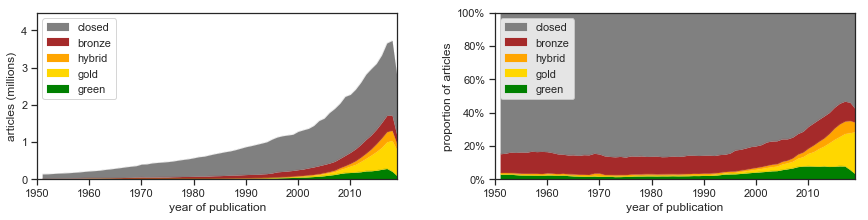

In [28]:
plot_area_and_proportion(articles_by_simple_colors_df, 
                         "simple", 
                         1950, 2019, 2019,
                         fancy=None)


**{{print figure_link("articles_by_simple_colors")}}: Articles by OA type, by year of publication. OA type as of October 2019.**

In [29]:
register_new_figure("articles_by_simple_colors_zoom");


The early years of {{ print figure_link("articles_by_simple_colors") }} is similar to Figure 2 in Piwowar et al. (2018), with one notable difference: some of what was considered Bronze OA (and to a lesser extent hybrid OA) in Piwowar et al. (2018) is classified as Gold OA in the current analysis. This is due to an improvement in Unpaywall's algorithms. Originally, Unpaywall used the Directory of Open Access Journals (DOAJ) as the sole arbiter of whether a journal was "fully-OA." Unpaywall still uses DOAJ in this way, but it now also adds an empirical check for OA journals (if 100% of a journal's articles are OA, it is listed as an OA journal). This results in a more comprehensive and accurate list of fully-OA journals, which in turn moves some articles into Gold from Hybrid and Bronze. 

We notice an overall publication drop in the last year of {{ print figure_link("articles_by_simple_colors") }}.  This is because the graph does not include a full publication year for 2019 (this analysis was last run on {{print datetime.datetime.now().isoformat()[0:10]}}).  We can also see a visible decrease in the proportion of OA (particularly Green) in the most recent publication years.  The close-up in {{ print figure_link("articles_by_simple_colors_zoom") }} makes this even more clear.  This change in OA proportions is because many articles pubished in 2018 are still under embargo at the time of this analysis (September 2019), so they are considered "Closed" in this graph even though they may ultimately become Green OA or Bronze OA.  More on this in [Section 4.3](#section-4-3).


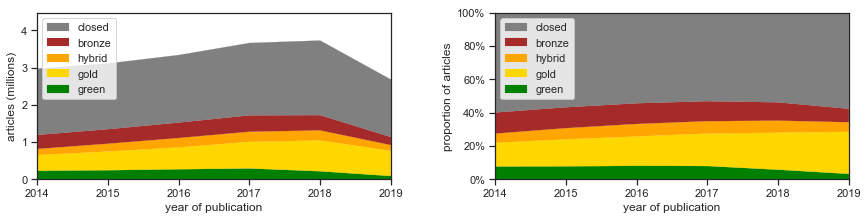

In [30]:
plot_area_and_proportion(articles_by_simple_colors_df, 
                         "simple", 
                         2014, 2019, 2019,
                         fancy=None)


**{{print figure_link("articles_by_simple_colors_zoom")}}: Articles by OA type, since 2014, by year of publication. OA type as of October 2019.**

In [31]:
register_new_figure("articles_by_simple_colors_cumulative");

A cumulative view of {{ print figure_link("articles_by_simple_colors") }} is shown in {{ print figure_link("articles_by_simple_colors_cumulative") }}.


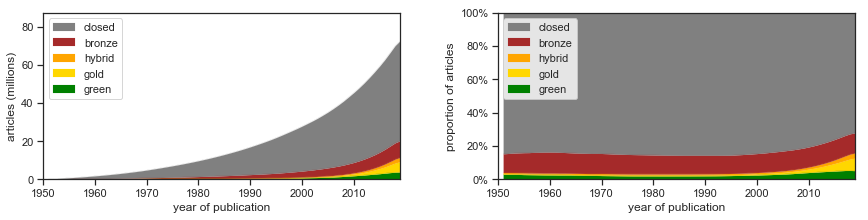

In [32]:
plot_area_and_proportion(articles_by_simple_colors_df, 
                         "simple", 
                         1950, 2019, 2019,
                         fancy="cumulative")


**{{print figure_link("articles_by_simple_colors_cumulative")}}: Cumulative articles by OA type, by year of publication. OA type as of October 2019.**

### 4.3 Predicting number of articles by OA type, by date of observation


#### 4.3.1 Date of publication vs. Date of observation

To predict the growth of OA in future years, we might be tempted to simply extrapolate the growth of OA types in {{ print figure_link("articles_by_simple_colors") }} or {{ print figure_link("articles_by_simple_colors_cumulative") }}, perhaps excluding recent publications to avoid the affect of embargos shown in {{ print figure_link("articles_by_simple_colors_zoom") }}.

The downside of this simple extrapolation approach is that it only gives us OA type *by date of publication*.  As {{ print figure_link("articles_by_simple_colors_zoom") }} suggests, the impact of embargos is significant, and means that understanding OA by date of publication isn't very useful.  What we really want is OA by *year of observation*.

We show the difference in these by a few diagrams:  
            `insert diagrams here`
            
We'll compute OA by year of observation by first understanding OA lag by OA type, then extrapolating OA growth from there.

#### 4.3.2 OA lag

For Gold OA and Hybrid OA understanding OA lag is easy -- there is no lag: papers are OA at the time of publication. 

For Green and Bronze OA the lag is more complicated. Authors often self-archive (upload their paper to a repository) months or years after the official publication date of the paper, typically  because the journal has a policy that authors must wait a certain length of time (the "embargo period") before self-archiving. Funder policies that mandate Green OA often allow a delay between publication and availability (notably the National Institutes of Health in the USA, accounting for most of the content in the large PMC repository). Finally, some journals open up their back catalogs once articles reach a certain age, which has been called "delayed OA" (Laakso and Björk, 2013) and we consider an important subset of Bronze.

We explore and model these dynamics below.

#### 4.3.3. OA lag for Green OA

In [33]:
register_new_figure("oa_lag_green");

The age of an article when it available as Green OA can be derived from the date it was published in a repository, which we can get from its matched [OAI-PMH records](https://www.openarchives.org/pmh/) (as harvested by Unpaywall).  

{{ print figure_link("oa_lag_green") }} shows Green OA articles by date first made OA.  Articles first made OA in 2015 are shown in the first row, 2016 the second row, and so on.  Articles in each row are displayed as histograms by date of publication.  


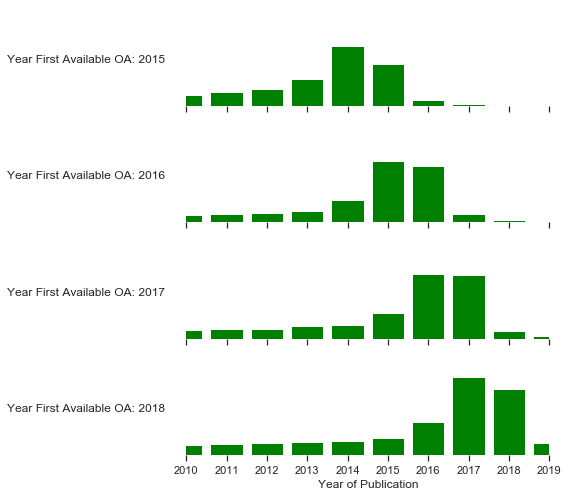

In [34]:
first_detailed_plots("green")

**{{print figure_link("oa_lag_green")}}: OA lag for Green OA**


The first row of {{ print figure_link("oa_lag_green") }} is a histogram of all articles became newly available as Green OA in 2015, binned by year of publication.  By looking at the first row in depth, we can see that a few articles are made available *before* they are actually published (articles published in 2016 or 2017) -- these were  preprints, submitted before publication.  Continuing to look at the first row, we can see the bulk of the articles that became available in 2015 were published in 2015 (lag of zero years) or in 2016 (lag of 1 year).  A few were published in 2015 (an OA lag of 2 years), and then a long tail represents the backfilling of older articles.  

Looking now at all rows of {{ print figure_link("oa_lag_green") }}, we can see that a similar OA lag pattern (a few preprints are available before publication, most articles become available within a 3 year OA lag, then a long tail) has held for the last four years of Green OA availability (the distribution of the bars are similar in all four rows. 

We can also see that the relative amount of green OA is growing slightly by year of observation (the area under the whole histogram is higher for subsequent years of observation).  

We will predict the pattern and absolute amount of green OA based on these trends in [Section 4.3.7](#section-4-3-7).

More details on Green OA lag are included in the Supplementary Information.

#### 4.3.4 OA lag for Bronze Delayed OA

There was no publicly-available definitive list of Delayed OA journals, so we derived a list empirically based on the Unpaywall database. We cross-checked the list with journal policies as well as Laakso and Björk (2013) and these sources:

-   <https://www.elsevier.com/about/open-science/open-access/open-archive>

-   <http://highwire.stanford.edu/cgi/journalinfo#loc>

-   <https://www.ncbi.nlm.nih.gov/pmc/journals/?filter=t3&titles=current&search=journals#csvfile>

-   <https://en.wikipedia.org/wiki/Category:Delayed_open_access_journals>

Our resulting list includes 2.5 million articles published in 546 journals, with the following embargo lengths:

embargo	length (months)|number of journals
---|---
6	|58
12	|175
18	|137
24	|42
36	|71
48	|63
Total	|546

In [35]:
register_new_figure("oa_lag_delayed_bronze");


We approach the availability of Bronze Delayed OA the same way as Green OA above, 

Their distribution of Delayed Bronze OA articles by date first made OA is shown in {{ print figure_link("oa_lag_delayed_bronze") }}, as histograms by publication date. Most articles become available after a 1 year lag.  Bumps that represent articles that become available at 24, 36, and 48 months are also clearly visible.

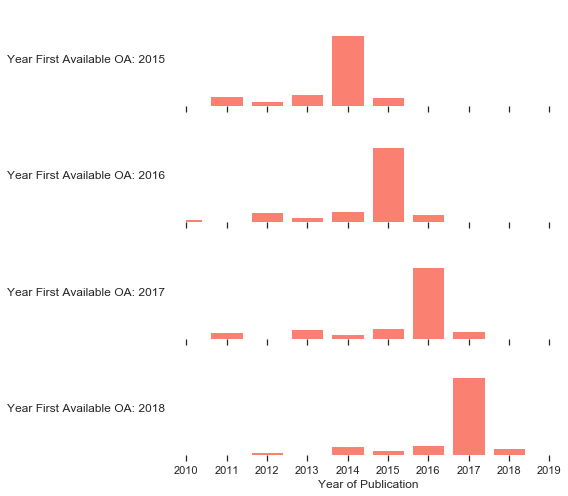

In [36]:
first_detailed_plots("delayed_bronze")

**{{print figure_link("oa_lag_delayed_bronze")}}: OA lag for Delayed Bronze**

#### 4.3.5 Closed access at date of observation

Closed access articles don't have an OA lag *per se*, but whether an article is considered Closed access may differ by date of observation if it begins Closed when it is published and later becomes Green or Bronze OA.  

We model this simply by considering an article Closed access at the date of observation if it has been published and is not considered OA at the time of observation.

#### 4.3.6 OA by date of observation, historically

In [37]:
register_new_figure('small-multiples-num-papers-past');

We combine the OA lags modelled above to graph OA by date of observation in {{ print figure_link('small-multiples-num-papers-past')}}.  

Each row is a year of observation, from 2012 to 2015.   Each column is a different OA type.  Each mini plot is a histogram of all articles available by the given observation date, for the OA type. 

In [38]:
# start here 

now_year = 2015
papers_per_year_historical = pd.DataFrame()
for graph_type in graph_type_order:
    for prediction_year in range(2000, now_year+1):        
        papers_per_year = get_papers_by_availability_year(graph_type, prediction_year, just_this_year=True)
        papers_per_year["graph_type"] = graph_type
        papers_per_year["prediction_year"] = prediction_year
        papers_per_year_historical = papers_per_year_historical.append(papers_per_year)


In [39]:
# def prof_function():
#     x=10*20
#     y=10+x
#     return (y)

In [40]:
# %lprun -f get_papers_by_availability_year get_papers_by_availability_year("closed", 2006, False)

In [41]:
# figure out if I also need this or if the code above does the same thing

def get_all_predicted_papers(my_min, my_max):
    all_predicted_papers = pd.DataFrame()
    for i, graph_type in enumerate(graph_type_order):
        all_data = get_papers_by_availability_year_including_future(graph_type, my_min, my_max)
        all_data["graph_type"] = graph_type
        all_predicted_papers = all_predicted_papers.append(all_data)
    return all_predicted_papers

%cache all_predicted_papers_historically = get_all_predicted_papers(2000, 2015)

loading cached value for variable 'all_predicted_papers_historically'. Time since pickling  1 day, 4:37:51.976639


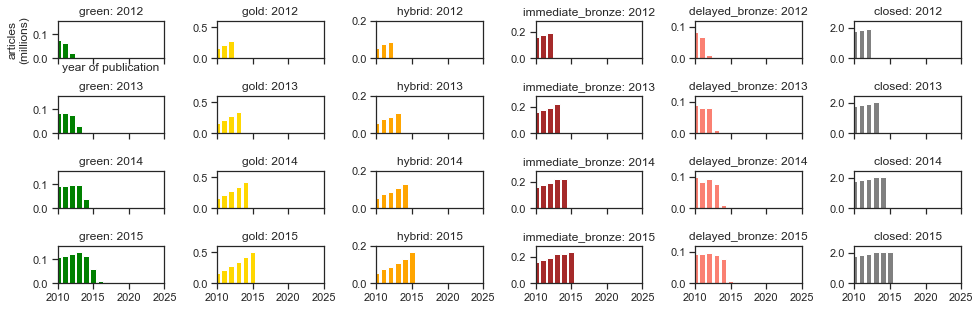

In [42]:
my_range = range(2012, 2015+1)

fig, axes = plt.subplots(len(my_range), len(graph_type_order), figsize=(13, 4), sharex=True, sharey=False)
axes_flatten = axes.flatten()
plt.tight_layout(pad=0, w_pad=2, h_pad=1)
plt.subplots_adjust(hspace=1)

i = 0
for observation_year in my_range:
    for graph_type in graph_type_order:
        y_max = all_predicted_papers_historically.loc[all_predicted_papers_historically.graph_type == graph_type]["num_articles"].max()
        this_data = all_predicted_papers_historically.copy()
        this_data = this_data.loc[this_data.graph_type == graph_type]
        this_data = this_data.loc[this_data.prediction_year == observation_year]
        this_data["publication_date"] = [int(observation_year - a) for a in this_data.article_years_from_availability]
        new_data = graph_available_papers_in_observation_year_by_pubdate(graph_type, this_data, observation_year, ax=axes_flatten[i])
        axes_flatten[i].set_ylim(0, 1.2*y_max)
        i += 1
axes_flatten[0].set_ylabel("articles\n(millions)");
axes_flatten[0].set_xlabel("year of publication");


**{{print figure_link("small-multiples-num-papers-past")}}: Articles by year of observation, 2012-2015.**  Each row is a Year of Observation, the x-axis is the Year of Publication, and the y-axis is the total number of articles (millions).

In [43]:
first_year_row = 2012

We can see that Gold, Hybrid, and Immediate Bronze OA articles all simply accumulate new articles each year of observation in the corresponding year of publication (the {{ print first_year_row+1}} rows are identical to their {{ print first_year_row}} counterparts, other than the addition of the most recent year new bar).  

In contrast, Green OA and Delayed Bronze OA graphs all have more complicated additions.  The graphs for the {{ print first_year_row+1}} observation year differ from the {{ print first_year_row}} graphs  above them in that they have a few new publications in {{ print first_year_row+1}}, but they also boost the {{ print first_year_row}} publication year, and even older years.  In fact we can see that when observed in {{ print first_year_row+3}} (the bottom row of the whole figure) Green OA is higher in all publication years than it was in the observation year {{ print first_year_row}} (the top row in the figure) because of expired embargos and backfilling.  A similar trend is visible for Delayed Bronze OA.  

The Closed access graph has the opposite trend -- its most recent observation year in the bottom row shows *fewer* papers considered Closed OA published in 2010 (the first bar in the histogram) compared to an observation in {{ print first_year_row}} (first row).  This is because some of what was "observed" as Closed in {{ print first_year_row}} has become Green and Bronze by the observation year of {{ print first_year_row+3}}, and therefore no longer appears in the Closed access histograms.

<a id="section-4-3-7"></a>
#### 4.3.7 Extrapolating growth

We wish to extend {{print figure_link("small-multiples-num-papers-past")}} to future years.  How can we extrapolate these graphs into the future?

The model we use is based on observing that the papers that become available each year have a consistent distribution by article age, as seen in {{print figure_link("oa_lag_green")}} for Green OA and {{print figure_link("oa_lag_delayed_bronze")}} for Bronze OA (the rows within each graph have a similar shape).  

If we then assume that the articles that will become available next year are similar to the articles that became available this year, we can predict the future like this:

***
```
    total articles available next year, for a given age and OA type  = 

        (total articles available this year, for the age and OA type)

         +

        (scaling factor to account for growth, for the OA type
        
         *

         articles made available last year, for the age and OA type)
```
***


In [44]:
register_new_figure('scaling_factor');

The `total articles available this year` is the observation year 2018 (the last row) in {{print figure_link("small-multiples-num-papers-past")}}, and the `articles made available last year, for the age and OA type` is the last row of  {{print figure_link("oa_lag_green")}} for Green OA and {{print figure_link("oa_lag_delayed_bronze")}} for Bronze OA.  All that remains is to calculate the `scaling factor to account for growth, for the OA type`.  We do this below, in {{print figure_link("scaling_factor")}}.

{{print figure_link("scaling_factor")}} shows graphs of the last five years of OA made available by year (y-axis) for each OA type.  The first row is a linear fit to this data, the second row is an exponential fit, and the final row is an exponential fit with a different optimization seed.  The curve fits were done using the `scipy.optimize.curve_fit()` function.  The r<sup>2</sup> value is shown below each graph to indicate the goodness of fit.  


In [46]:
# Nonlinear curve fit with confidence interval
def curve_fit_with_ci(graph_type, papers_per_year_historical, curve_type, ax=None):
    my_rows = papers_per_year_historical.loc[papers_per_year_historical.article_years_from_availability <= 5]
    x = my_rows.groupby("prediction_year", as_index=False).sum().prediction_year
    y = my_rows.groupby("prediction_year", as_index=False).sum().num_articles

    my_color_lookup = graph_type_plus_biorxiv_lookup.loc[graph_type_plus_biorxiv_lookup["name"]==graph_type]
    my_color = my_color_lookup.iloc[0]["color"]
    
    if curve_type == "linear":
        initial_guess=None
        def func(x, a, b):
            return a * (x - 2000) + b
    elif curve_type == "exp":
        if graph_type == "biorxiv":
            initial_guess=(5, 1, 1)
            def func(x, a, b, d):
               return b + a * np.exp((x - 2014)/d)
        else:
            initial_guess=(14287, 21932, 5)
            def func(x, a, b, d):
               return b + a * np.exp((x - 2000)/d)
    elif curve_type == "negative_exp":
        initial_guess=(1731700, 22962997, -7)
        def func(x, a, b, d):
           return b - a * np.exp((x - 2000)/d) 

    pars, pcov = curve_fit(func, x, y, initial_guess)

    xfit_extrap = range(2000, 2040+1)
    if curve_type == "linear":
        yfit_extrap = [func(a, pars[0], pars[1]) for a in xfit_extrap]
        yfit = [func(a, pars[0], pars[1]) for a in x]
    else:
        yfit_extrap = [func(a, pars[0], pars[1], pars[2]) for a in xfit_extrap]
        yfit = [func(a, pars[0], pars[1], pars[2]) for a in x]
        
    alpha = 0.05 # 95% confidence interval = 100*(1-alpha)
    n = len(y)    # number of data points
    p = len(pars) # number of parameters
    dof = max(0, n - p) # number of degrees of freedom
    tval = t.ppf(1.0-alpha/2., dof) # student-t value 

    residuals = y - yfit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    fit_string = ""
    for i, p, var in zip(range(n), pars, np.diag(pcov)):
        sigma = var**0.5
        fit_string += ' p{}: {} [{}  {}] '.format(i, 
                                            round(p, 3),
                                            round(p - sigma*tval, 3),
                                            round(p + sigma*tval, 3))
    fit_string += "{}".format(round(r_squared, 3))
#     print "{} {} {}".format(graph_type, curve_type, fit_string)

    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(3, 3), sharex=True, sharey=False)
    ax.plot(x, y, 'o', color=my_color)
    ax.set_xlim(2000, 2025)

    ax.plot(xfit_extrap[0:25], yfit_extrap[0:25], '-', color=my_color)
    ax.set_xlabel("r^2={}".format(round(r_squared, 3)))
    ax.set_title("{}, {}".format(graph_type, curve_type))
    if max(yfit_extrap) > 100000:
        ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.2f}'.format(y/(1000*1000.0))))
    my_return = pd.DataFrame({
        "x": xfit_extrap,
        "y": yfit_extrap,
        "r_squared": [r_squared for y in yfit_extrap]
    })
    return my_return

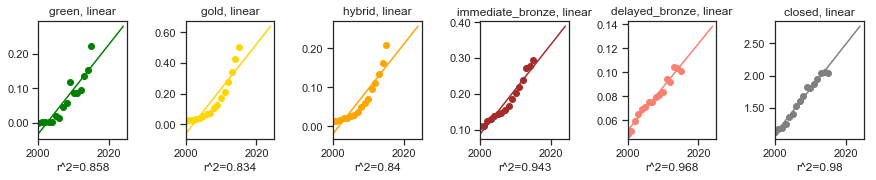

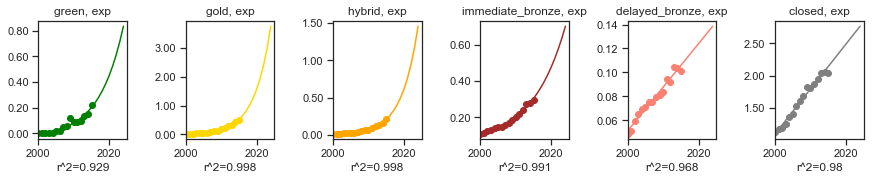

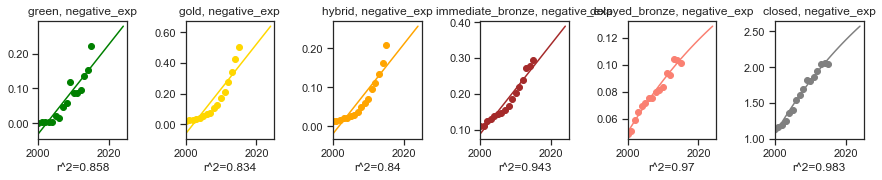

In [47]:
naive_data_all = pd.DataFrame()

for i, curve_type in enumerate(["linear", "exp", "negative_exp"]):
    fig, axes = plt.subplots(1, len(graph_type_order), figsize=(12, 2), sharex=True, sharey=False)
    axes_flatten = axes.flatten()
    plt.tight_layout(pad=0, w_pad=2, h_pad=1)
    plt.subplots_adjust(hspace=1)

    for i, graph_type in enumerate(graph_type_order):
        curve_type_display = curve_type
        data_for_plot = papers_per_year_historical.loc[papers_per_year_historical.graph_type==graph_type]
        new_data = curve_fit_with_ci(graph_type, data_for_plot, curve_type=curve_type_display, ax=axes_flatten[i])
        new_data["curve_type"] = curve_type
        new_data["graph_type"] = graph_type
        naive_data_all = naive_data_all.append(new_data)

    plt.show()

final_extraps = pd.DataFrame()
final_extraps = final_extraps.append(naive_data_all.loc[(naive_data_all.graph_type == "delayed_bronze") & (naive_data_all.curve_type=="negative_exp")])
final_extraps = final_extraps.append(naive_data_all.loc[(naive_data_all.graph_type == "closed") & (naive_data_all.curve_type=="negative_exp")])
final_extraps = final_extraps.append(naive_data_all.loc[(naive_data_all.graph_type != "delayed_bronze") &
                                                        (naive_data_all.graph_type != "closed") & 
                                                        (naive_data_all.curve_type=="exp")])


**{{print figure_link("scaling_factor")}}: Articles by year of observation.**  Each row is a year of observation, the x-axis is the year of publication, and the y-axis is the total number of number of articles (millions) .

In [48]:
register_new_figure('small-multiples-num-papers-future');

We chose the extrapolation functions with the highest r<sup>2</sup> values for each OA type, and used these to derive scaling factors for extrapolations through the year 2025.  Using these scaling factors, we predict the growth of OA as shown in {{print figure_link("small-multiples-num-papers-future")}}

In [49]:
%cache all_predicted_papers_future = get_all_predicted_papers(1995, 2026)

loading cached value for variable 'all_predicted_papers_future'. Time since pickling  20:41:26.903473


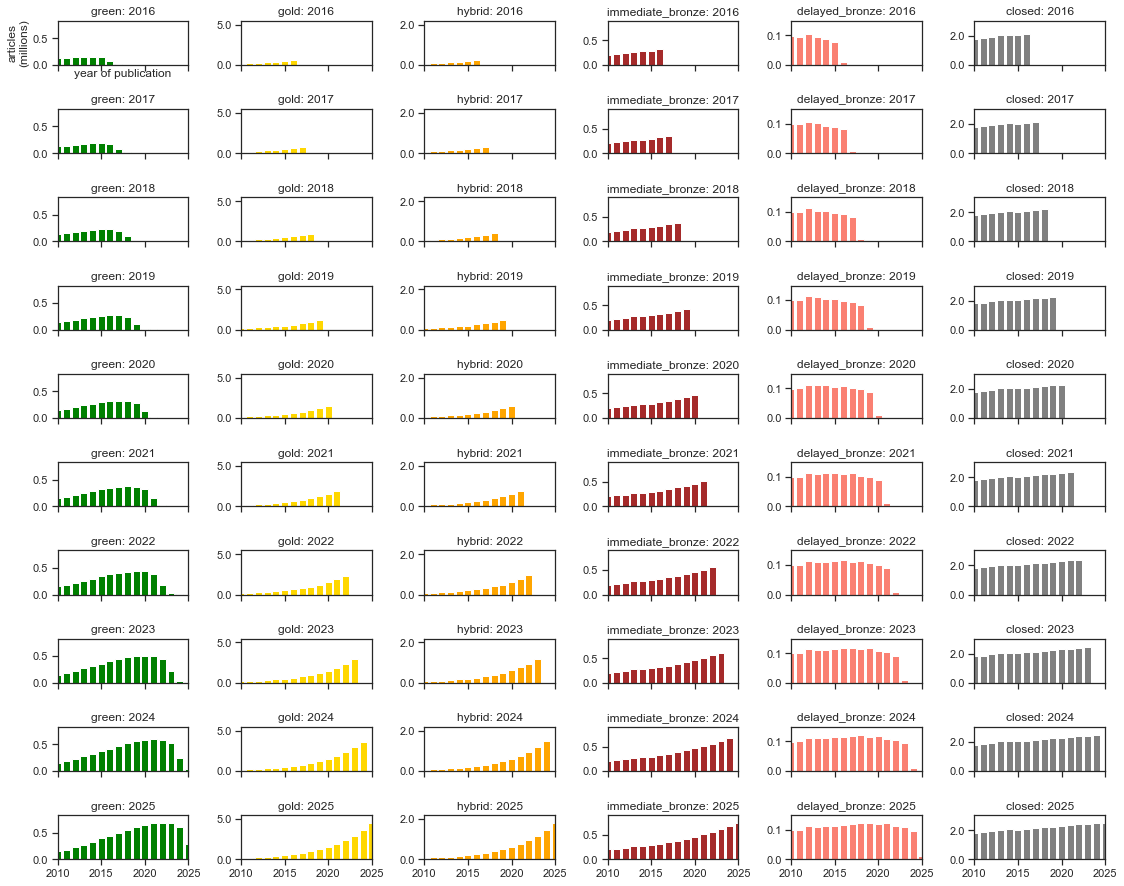

In [50]:
max_year_to_graph=2025
my_range = range(2016, max_year_to_graph+1)

fig, axes = plt.subplots(len(my_range), len(graph_type_order), figsize=(15, 12), sharex=True, sharey=False)
axes_flatten = axes.flatten()
plt.tight_layout(pad=0, w_pad=2, h_pad=1)
plt.subplots_adjust(hspace=1)

i = 0
for observation_year in my_range:
    for graph_type in graph_type_order:
        this_data = all_predicted_papers_future.copy()
        this_data = this_data.loc[this_data.graph_type == graph_type]
        this_data = this_data.loc[this_data.prediction_year == observation_year]
        this_data["publication_date"] = [int(observation_year - a) for a in this_data.article_years_from_availability]
        new_data = graph_available_papers_in_observation_year_by_pubdate(graph_type, this_data, observation_year, ax=axes_flatten[i])

        y_max = all_predicted_papers_future.loc[(all_predicted_papers_future.graph_type == graph_type) &
                                               (all_predicted_papers_future.prediction_year <= max_year_to_graph)]["num_articles"].max()
        axes_flatten[i].set_ylim(0, 1.2*y_max)
        i += 1
axes_flatten[0].set_ylabel("articles\n(millions)");
axes_flatten[0].set_xlabel("year of publication");


**{{print figure_link("small-multiples-num-papers-future")}}: Articles by year of observation, extrapolated into the future.**   Each row is a Year of Observation, the x-axis is the Year of Publication, and the y-axis is the total number of articles (millions).

#### 4.3.8 OA by date of observation

We can graph the total number of OA articles by year of observation by taking the area under the histograms above -- calculating *all* articles available by OA type on the date of publication, independently of publication year.  We show this in {{print figure_link("articles_by_observation_year_prediction")}}.

loading cached value for variable 'all_predicted_papers_future'. Time since pickling  20:43:16.875513


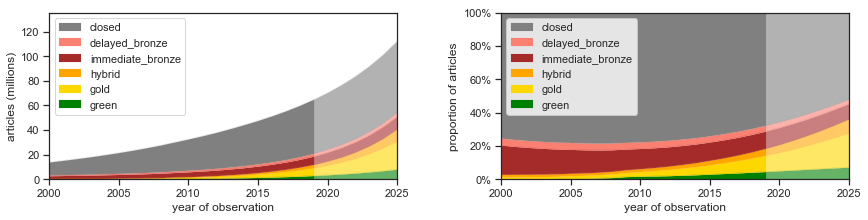

In [51]:
%cache all_predicted_papers_future = get_all_predicted_papers(1995, 2026)
register_new_figure("articles_by_observation_year_prediction");
articles_by_obs_year_df = all_predicted_papers_future.copy()
articles_by_obs_year_df = articles_by_obs_year_df.rename(
    columns={"prediction_year": "x", "num_articles": "y"})
plot_area_and_proportion(articles_by_obs_year_df, 
                         "standard", 
                         2000, 2025, 2018,
                         xlabel="year of observation")


**{{print figure_link("articles_by_observation_year_prediction")}}: Total articles by OA type, by year of observation.** OA type as of year of observation.

The shape of {{print figure_link("articles_by_observation_year_prediction")}} is very similar to the years 2000-2018 of {{print figure_link("articles_by_simple_colors_cumulative")}}, the cumulative graph of papers by publication date, by OA type.  

If we plot the difference between observation years in {{print figure_link("articles_by_observation_year_prediction")}}, we get the *net change* in articles by OA type, by year of observation.  This net change is shown in {{print figure_link("articles_by_observation_year_prediction_diff")}}.  It looks quite similar to {{print figure_link("articles_by_simple_colors")}} between the years 2000 and 2018. 

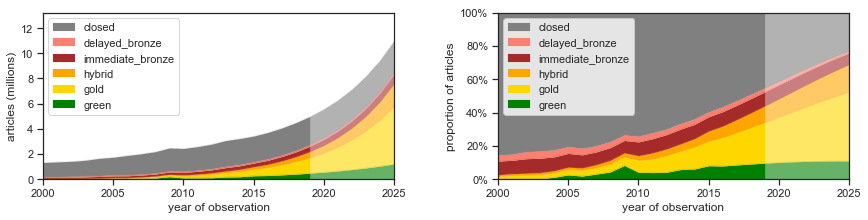

In [52]:
register_new_figure("articles_by_observation_year_prediction_diff");
articles_by_obs_year_df = all_predicted_papers_future.copy()
articles_by_obs_year_df = articles_by_obs_year_df.rename(
    columns={"prediction_year": "x", "num_articles": "y"})

# articles_by_obs_year_df_closed = articles_by_obs_year_df.loc[
#     (articles_by_obs_year_df.graph_type=="closed") & 
#     (articles_by_obs_year_df.x <= 2025)]
# print articles_by_obs_year_df_closed
# plt.plot(articles_by_obs_year_df_closed.groupby("x").y.sum())
# plt.ylim(0, 2000000)

# plt.plot(articles_by_obs_year_df_closed.groupby("x").y.sum().diff())
# plt.ylim(0, 2000000)
a = plot_area_and_proportion(articles_by_obs_year_df, 
                         "standard", 
                         2000, 2025, 2018,
                         xlabel="year of observation", 
                         fancy="diff")


**{{print figure_link("articles_by_observation_year_prediction_diff")}}: Change in number of articles from previous year of observation, by OA type.** Includes newly published articles, as well as articles that have changed OA type.

### 4.4 Predicting articles views by OA availability

Now that we have an analysis of OA based on time of observation, rather than simply time of publication, we can extend our examination to include OA as a percentage of article *views*, rather than just number of articles.

To do this, we will examine data from the Unpaywall browser extension, as described in [Section 2.2](#section-2-2) above. This data allows us to make inferences about overall readership trends--which in turn will help us make predictions about how OA will impact global readers of the research literature.

We can start by describing this approach generally with the following 

***
```
 the number of times people view a paper in past and future years = 

     (the number of papers of a given age and OA type in past and future years) 

       *

     (how many times people view a paper, given its age and OA type)
```
***

We can state this more concisely and precisely as follows:

```
 estimated views = convolution(articles by age curve, views per article by age curve) 
```

To calculate how views change over time across OA types, we do this:

```
 for snapshot_year in range(2000, 2025):

    for oa_type in oa_types:

        views[snapshot_year][oa_type] = 
                        convolution(articles_by_age_curve[snapshot_year][oa_type],
                                    views_per_article_by_age_curve[oa_type]) 
```

where [convolution](https://en.wikipedia.org/wiki/Convolution) is the standard mathematical operation of modifying a signal by a channel, by integrating the product of the two curves after one is reversed and shifted.  

See Supplimentary Information for a walkthrough example.

In [53]:
register_new_figure("view-by-age-no-color");

It is well known that readers are more interested in accessing newly-published articles, and indeed this trend can be seen in the Unpaywall usage logs. {{ print figure_link("views_by_age_no_color") }} below summarizes access requests by users of the Unpaywall extension between August 2018 and August 2019, by age of the article they wished to read. As expected, readers are most interested in articles published less than a year ago.


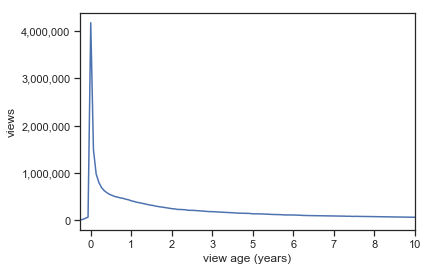

In [54]:
# hidden: code to query and graph 
%matplotlib inline

my_plot = data_usage_by_age_months_no_color_full_year.plot.line(x="article_age_months", y="num_views")
my_plot.set_xlim(-4, 120)
my_plot.xaxis.set_major_locator(plt.MaxNLocator(11))
ticks = [int(x) for x in my_plot.get_xticks()/12]  # convert months to years
my_plot.set_xticklabels(ticks);
my_plot.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('view age (years)')
plt.ylabel('views')
my_plot.get_legend().remove()

**{{print figure_link("views_by_age_no_color")}}: Views by article age**

How can we use this access data to predict the number of views that people will be interested in in the future? And how that differs from access demand in the past?


#### 4.4.1 Views per article by age curve


In [55]:
register_new_figure("views_by_age_with_color");

First, we use the access data we have from one specific month:  July 2019, which accounts for {{ print "{0:,.0f}".format(views_per_year_total.num_views_one_month.sum()) }} views.  

We group it by OA access type and plot it by age of the article in {{ print figure_link("views_by_age_with_color") }}.

loading cached value for variable 'views_per_year_total'. Time since pickling  1 day, 19:21:09.680031


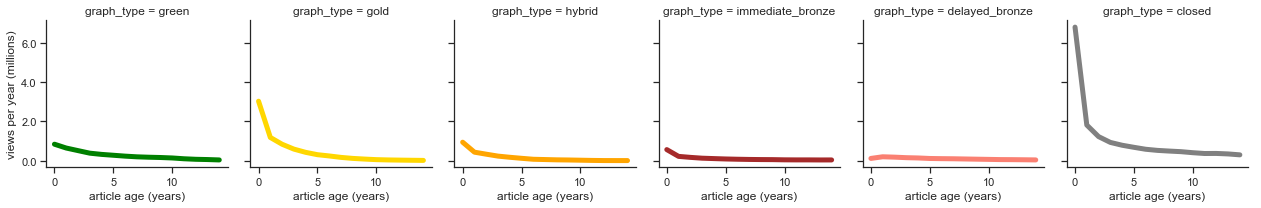

In [56]:
%cache views_per_year_total = get_views_per_year_total()  
data_now = views_per_year_total.loc[views_per_year_total["article_age_years"] >= 0]
g = sns.FacetGrid(data_now, col="graph_type", hue="graph_type", col_order=graph_type_order, hue_order=graph_type_order, palette=my_cmap_graph_type)
kws = dict(linewidth=5)
g.map(plt.plot, "article_age_years", "num_views_per_year", **kws);
for ax in g.axes.flat: 
    ax.set_xlabel("article age (years)")
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.1f}'.format(y/(1000*1000.0))))
g.axes.flat[0].set_ylabel("views per year (millions)");
    


**{{print figure_link("views_by_age_with_color")}}: Views by article age, by OA type**


Next, to calculate views *per article* we do the following:

***
```
    how many times people view a paper, given its age and OA type  = 

        (the total number of views to papers of a given age and OA type) 

         /

        (the number of papers of that age and OA type)
```
***

We can state this more concisely and precisely as follows:

```
views per article by age curve = dot_division(views by age curve, articles by age curve) 
    
```

where dot_division is the [element-wise Hadamard division](https://en.wikipedia.org/wiki/Hadamard_product_(matrices)) of two signals.


In [57]:
register_new_figure("num-papers-by-age-2018");

For article age curves, we use the curves we calculated in [Section 4.3.7](#section-4-3-7) above, specifically {{print figure_link("small-multiples-num-papers-future")}}.


loading cached value for variable 'papers_by_availability_year_total_2018'. Time since pickling  22:14:12.692062


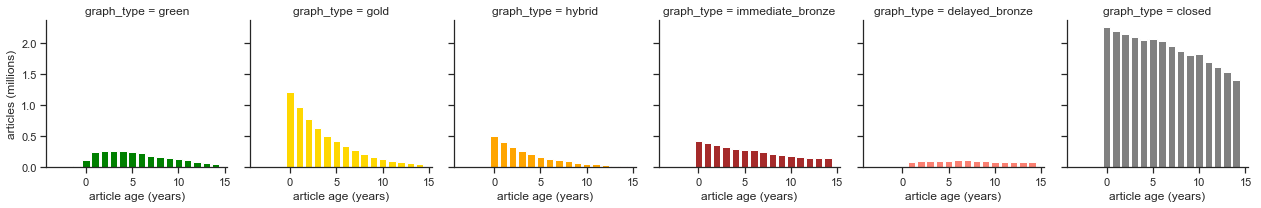

In [58]:
%cache papers_by_availability_year_total_2018 = get_papers_by_availability_year_total(2018)  
data_now = papers_by_availability_year_total_2018.loc[papers_by_availability_year_total_2018["article_years_from_availability"] < 15]
g = sns.FacetGrid(data_now, col="graph_type", hue="graph_type", col_order=graph_type_order, hue_order=graph_type_order, palette=my_cmap_graph_type)
g.map(plt.bar, "article_years_from_availability", "num_articles");
for ax in g.axes.flat: 
    ax.set_xlabel("article age (years)")
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.1f}'.format(y/(1000*1000.0))))
g.axes.flat[0].set_ylabel("articles (millions)");


**{{print figure_link("num-papers-by-age-2018")}}: Views by article age**

Now for each of the OA types individually, we divide these signals by each other. This means that, for each OA type, we divide the number of times someone viewed an article of that was 0 years old (in other words, brand new--in this case published between July 2018 and July 2019) by the number of total articles that were 0 years old -- articles that were published since July 2018. Then we take the next age bucket, 1 year old, and divide the number of views to 1 year old articles by the number of articles available in July 2019 that were 1 year old. We do this for all age bins (15 are shown in the graphs).

The result of these divisions are the signals below: the number of views per article, for a given age and OA type.


In [59]:
def get_views_per_article(graph_type):
    if graph_type == "biorxiv":
        graph_type = "green"
        
    views_per_year = get_views_per_year(graph_type)
    papers_per_year = get_papers_by_availability_year(graph_type, 2018, just_this_year=False)
    papers_per_year["article_age_years"] = papers_per_year["article_years_from_availability"]
    papers_per_year = papers_per_year.loc[(papers_per_year["article_age_years"] <=15 )]

    data_merged_clean = papers_per_year.merge(views_per_year, on=["article_age_years"])        
    data_merged_clean["views_per_article"] = data_merged_clean["num_views_per_year"] / data_merged_clean["num_articles"]

    views_per_article = pd.DataFrame(data_merged_clean, columns=["article_age_years", "views_per_article"])
    views_per_article = views_per_article.sort_values(by="article_age_years")

    if graph_type=="delayed_bronze":
        # otherwise first one is too high because number articles too low in year 0 for delayed subset
        views_per_article.loc[views_per_article.article_age_years==0, ["views_per_article"]] = float(views_per_article.loc[views_per_article.article_age_years==1].views_per_article)

    return views_per_article

def get_views_per_article_total():
    all_data = pd.DataFrame()
    for prep_graph_type in ["gold", "hybrid", "green", "immediate_bronze", "delayed_bronze", "closed"]:
        temp_papers = get_views_per_article(prep_graph_type)
#         print prep_graph_type
#         print "{:,.0f}".format(temp_papers.views_per_article.max()), "{:,.0f}".format(temp_papers.views_per_article.sum())
#         print "\n"
        temp_papers["graph_type"] = prep_graph_type
        all_data = all_data.append(temp_papers)
    return all_data

In [60]:
register_new_figure("views-by-article");

loading cached value for variable 'views_per_article_total'. Time since pickling  22:14:20.372570


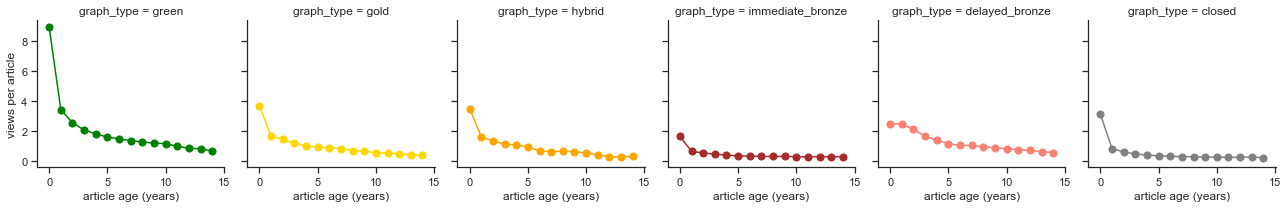

In [61]:

%cache views_per_article_total = get_views_per_article_total()  
data_now = views_per_article_total.loc[views_per_article_total["article_age_years"] >= 0]
g = sns.FacetGrid(data_now, col="graph_type", hue="graph_type", col_order=graph_type_order, hue_order=graph_type_order, palette=my_cmap_graph_type)
kws = dict(s=50)
g.map(plt.scatter, "article_age_years", "views_per_article", **kws);
g.map(plt.plot, "article_age_years", "views_per_article");
for ax in g.axes.flat: 
    ax.set_xlabel("article age (years)")
g.axes.flat[0].set_ylabel("views per article");

**{{print figure_link("views-by-article")}}: Views by article**

#### 4.4.2 Views by year

Finally, an estimate of total number of views in 2022 comes from summing together the views in 2022 across all article ages. In other words, the green X in the graph below at year 2022 is the area under the green curve in the row above -- the sum of all views to green OA of age 0, age 1, age 2, age 3, etc.


#### 4.4.3 Total Views

In [62]:
register_new_figure("views-small");

In [63]:
def get_predicted_views(graph_type, now_delta_years=0, label_for_graph=None, show_graph=True):
#     calc_min_year = 1951
    calc_min_year = 1995
    display_min_year = 2010
    now_year = 2020 - now_delta_years
    max_year = 2025
    exponential = False

    if graph_type == "biorxiv":
        exponential = True
        
    views_per_article = get_views_per_article(graph_type)
           
    df_views_by_year = pd.DataFrame()
    all_papers_per_year = get_papers_by_availability_year_including_future(graph_type, calc_min_year, max_year)
    for prediction_year in range(calc_min_year, max_year+1):        
#     for prediction_year in range(calc_min_year, 2019):        
#     for prediction_year in range(2017, 2019):        
        papers_per_year = all_papers_per_year.loc[all_papers_per_year["prediction_year"] == prediction_year]
#         print views_per_article.head()
        try:
            data_merged_clean = papers_per_year.merge(views_per_article, left_on=["article_years_from_availability"], right_on=["article_age_years"])
            data_merged_clean = data_merged_clean.sort_values("article_age_years")
            win = data_merged_clean["views_per_article"] 
            sig = data_merged_clean["num_articles"]
            views_by_observation_year = signal.convolve(win, sig, mode='same', method="direct")
            y = max(views_by_observation_year)
            df_views_by_year = df_views_by_year.append(pd.DataFrame({"observation_year":[prediction_year], "views": [y]}))
        except (ValueError, KeyError):  # happens when the year is blank
            pass
        

    return df_views_by_year

def get_predicted_views_total(observation_year):
    all_data = pd.DataFrame()
    for prep_graph_type in graph_type_order:
        temp_papers = get_predicted_views(prep_graph_type, observation_year)
        temp_papers["graph_type"] = prep_graph_type
        all_data = all_data.append(temp_papers)
    return all_data

loading cached value for variable 'predicted_views_total'. Time since pickling  20:37:52.444404


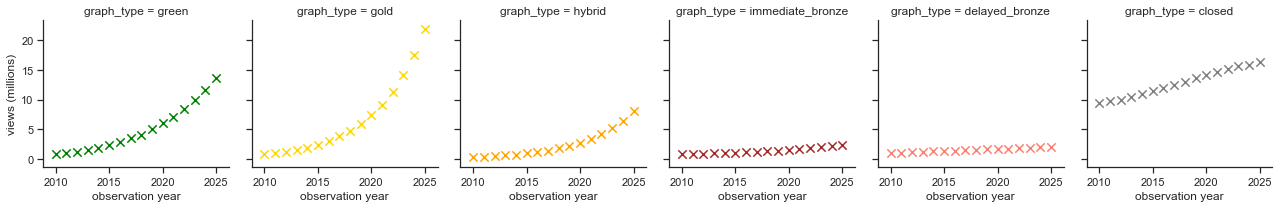

In [64]:
observation_year = 2025
%cache predicted_views_total = get_predicted_views_total(observation_year)  

data_now = predicted_views_total.loc[predicted_views_total["observation_year"] >= 2010]
g = sns.FacetGrid(data_now, col="graph_type", hue="graph_type", col_order=graph_type_order, hue_order=graph_type_order, palette=my_cmap_graph_type)
kws = dict(marker="x", s=70)
g.map(plt.scatter, "observation_year", "views", **kws);
for ax in g.axes.flat: 
    ax.set_xlabel("observation year")
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.0f}'.format(y/(1000*1000.0))))
g.axes.flat[0].set_ylabel("views (millions)");

**{{print figure_link("views-small")}}: Views** Views by observation year.

This gives us views for each year, 2010 to 2025, by OA type. The following graph is the same as the previous one, but without shared y axis so we can better see the relative trends. 


In [65]:
register_new_figure("views-large");

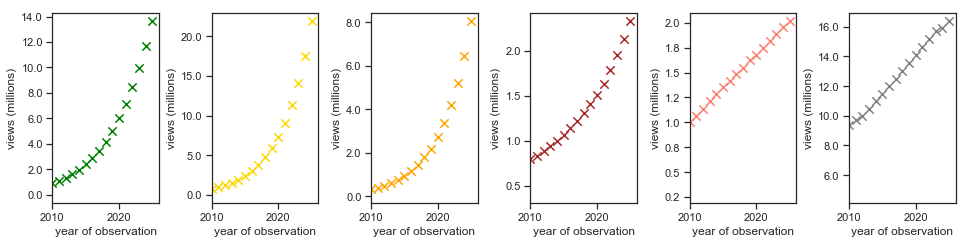

In [66]:
fig, axes = plt.subplots(1, len(graph_type_order), figsize=(13, 3), sharex=True, sharey=False)
axes_flatten = axes.flatten()
plt.tight_layout(pad=0, w_pad=2, h_pad=1)
plt.subplots_adjust(hspace=1)
prediction_of_views = pd.DataFrame()
for i, graph_type in enumerate(graph_type_order):
    predicted_views_this_graph = predicted_views_total.loc[predicted_views_total.graph_type==graph_type]
    new_data = graph_views(graph_type, data=predicted_views_this_graph, ax=axes_flatten[i])
    new_data["graph_type"] = graph_type
    prediction_of_views = prediction_of_views.append(new_data)

**{{print figure_link("views-large")}}: Views by year of view**

We can plot these lines stacked on top of each other to see how the OA types change over time.


In [67]:
register_new_figure("views_stacked");

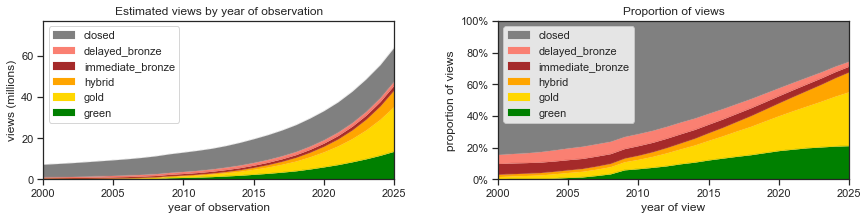

In [68]:

# not cumulative because cumulative views don't mean anything

all_data_pivot = predicted_views_total.pivot_table(
             index='observation_year', columns='graph_type', values=['views'], aggfunc=np.sum)\
       .sort_index(axis=1, level=1)\
       .swaplevel(0, 1, axis=1)
all_data_pivot.columns = all_data_pivot.columns.levels[0]
all_data_pivot
# all_data_pivot[oa_status_order].plot.area(stacked=True, color=oa_status_colors)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharex=True, sharey=False)
plt.tight_layout(pad=0, w_pad=2, h_pad=1)
plt.subplots_adjust(hspace=1)

all_data_pivot_graph = all_data_pivot
all_data_pivot_graph = all_data_pivot.loc[all_data_pivot.index > 1960]
my_plot = all_data_pivot_graph[graph_type_order].plot.area(stacked=True,  linewidth=.1, color=graph_type_colors, ax=ax1)
ax1.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.0f}'.format(y/(1000*1000.0))))
ax1.set_xlabel('year of observation')
ax1.set_ylabel('views (millions)')
ax1.set_xlim(2000, 2025)
ax1.set_ylim(0, 1.2*max(all_data_pivot_graph.sum(1)))
ax1.set_title("Estimated views by year of observation");
handles, labels = my_plot.get_legend_handles_labels(); my_plot.legend(reversed(handles[0:6]), reversed(labels[0:6]), loc='upper left');  # reverse to keep order consistent

df_diff_proportional = all_data_pivot_graph.div(all_data_pivot_graph.sum(1), axis=0)
my_plot = df_diff_proportional[graph_type_order].plot.area(stacked=True,  linewidth=.1, color=graph_type_colors, ax=ax2)
my_plot.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
ax2.set_xlabel('year of view')
ax2.set_ylabel('proportion of views')
ax2.set_title("Proportion of views");
ax2.set_xlim(2000, 2025)
ax2.set_ylim(0, 1)
handles, labels = my_plot.get_legend_handles_labels(); my_plot.legend(reversed(handles[0:6]), reversed(labels[0:6]), loc='upper left');  # reverse to keep order consistent

plt.tight_layout(pad=.5, w_pad=4, h_pad=2.0)  




**{{print figure_link("views_stacked")}}: Views, by year of view**

### 4.5 Extending the model:  Growth of bioRxiv

An advantage of building a model like we have above, is that we can now layer on alternate assumptions, and see how this affects the model. We can see how anticipated disruptions might affect OA in coming years.A comprehensive examination of all the alternative futures is of course outside the scope of this paper. However,  example will be illustrative.

bioRxiv, a preprint server in biology, provides an excellent example.  As described in Abdill and Blekhman (2019), deposits into bioRxiv are growing rapidly. If growth continues at the current rate, biorxiv could prove to be a major disruptor. It has the potential to have a large effect on growth of OA and the usage of OA particularly because the vast majority of the deposits are made available before article publication (and so are available during the most demanded time of usage).

We model the growth of bioRxiv and its impact on OA availability here by extrapolating from bioRxiv papers that:

-   were deposited before they were published (to simplify the model), and

-   were published in subscription journals.

These are plotted below, and then a logarithmic extrapolation is done to show the anticipated growth in otherwise-closed bioRxiv papers through 2025.


In [69]:
register_new_figure("biorxiv-exp");

In [70]:
biorxiv_now_year = 2018

# reset
papers_per_year_historical = papers_per_year_historical.loc[papers_per_year_historical.graph_type != 'biorxiv']

for graph_type in ["biorxiv"]:
    for prediction_year in range(2000, biorxiv_now_year+1):        
        papers_per_year = get_papers_by_availability_year(graph_type, prediction_year, just_this_year=True)
        papers_per_year["graph_type"] = graph_type
        papers_per_year["prediction_year"] = prediction_year
        papers_per_year_historical = papers_per_year_historical.append(papers_per_year)

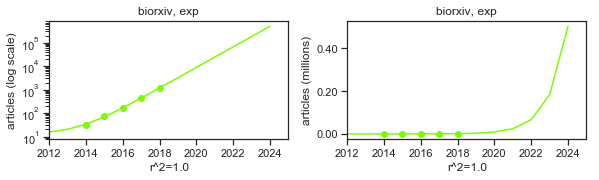

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(8, 2), sharex=True, sharey=False)
axes_flatten = axes.flatten()
plt.tight_layout(pad=0, w_pad=2, h_pad=1)
plt.subplots_adjust(hspace=1)
    
data_for_plot = papers_per_year_historical.loc[papers_per_year_historical.graph_type=="biorxiv"]
new_data = curve_fit_with_ci("biorxiv", data_for_plot, curve_type="exp", ax=axes_flatten[0])
new_data["curve_type"] = "exp"
new_data["graph_type"] = "biorxiv"
final_extraps = final_extraps.loc[final_extraps.graph_type != 'biorxiv']
final_extraps = final_extraps.append(new_data)
axes_flatten[0].set_xlim(2012, 2025)
axes_flatten[0].set_yscale("log")
axes_flatten[0].set_ylabel("articles (log scale)");

# again to graph on non-log plot
curve_fit_with_ci("biorxiv", data_for_plot, curve_type="exp", ax=axes_flatten[1])
axes_flatten[1].set_xlim(2012, 2025)
axes_flatten[1].set_ylabel("articles (millions)");

**{{print figure_link("biorxiv-exp")}}: bioRxiv extrapolation**

Here's how this affects all papers:

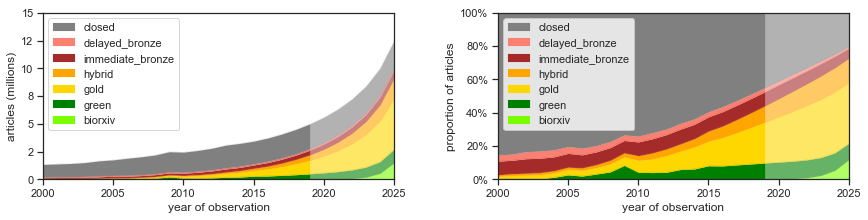

In [72]:
all_predicted_papers_future_plus_biorxiv = all_predicted_papers_future.copy()

biorxiv_predicted_papers = get_papers_by_availability_year_including_future("biorxiv", 1995, 2026)
biorxiv_predicted_papers["graph_type"] = "biorxiv"

all_predicted_papers_future_plus_biorxiv = all_predicted_papers_future_plus_biorxiv.append(biorxiv_predicted_papers)

register_new_figure("articles_by_observation_year_prediction_plus_biorxiv");

articles_by_obs_year_df_plus_biorxiv = all_predicted_papers_future_plus_biorxiv.copy()
articles_by_obs_year_df_plus_biorxiv = articles_by_obs_year_df_plus_biorxiv.rename(
    columns={"prediction_year": "x", "num_articles": "y"})
plot_area_and_proportion(articles_by_obs_year_df_plus_biorxiv, 
                         "standard_plus_biorxiv", 
                         2000, 2025, 2018,
                         xlabel="year of observation", 
                         fancy="diff")

**{{print figure_link("articles_by_observation_year_prediction_plus_biorxiv")}}: New papers available, including bioRxiv**

Next we want to roughly understand the impact of this growth of OA papers on access trends. For simplicity we use the generic green OA access trend derived in the Access section above (not enough bioRxiv data exists yet to make its own specific curve). When we apply this access trend to the predicted growth of bioRxiv papers, we estimate the following views over time: 

In [73]:
register_new_figure("biorxiv-views");

In [95]:
# %cache predicted_views_total = get_predicted_views_all()
# data_now = predicted_views_total.loc[predicted_views_total["observation_year"] >= 2010]
# g = sns.FacetGrid(data_now, col="graph_type", hue="graph_type", col_order=graph_type_order, hue_order=graph_type_order, palette=my_cmap_graph_type)
# kws = dict(marker="x", s=70)
# g.map(plt.scatter, "observation_year", "views", **kws);
# for ax in g.axes.flat: 
#     ax.set_xlabel("year of observation")
#     ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.1f}'.format(y/(1000*1000.0))))
# g.axes.flat[0].set_ylabel("views (millions)");

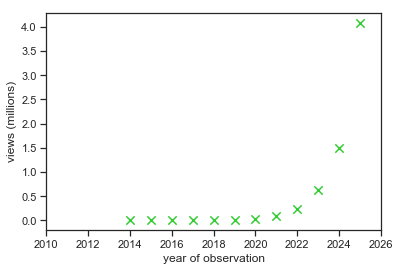

In [75]:
total_views_including_biorxiv = predicted_views_total.copy()
biorxiv_views = graph_views("biorxiv");
biorxiv_views["graph_type"] = "biorxiv"
biorxiv_views["oa_status"] = "biorxiv"
total_views_including_biorxiv = total_views_including_biorxiv.append(biorxiv_views)

**{{print figure_link("biorxiv-views")}}: bioRxiv extrapolation**

In [76]:
register_new_figure("biorxiv-stacked");

Finally, we include these views in the total picture. As we can see, bioRxiv has the potential to boost OA availability noticeably. 


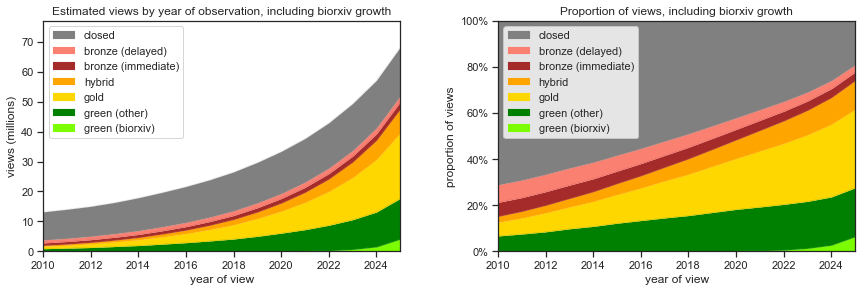

In [77]:
all_data_pivot_plus_biorxiv = total_views_including_biorxiv.pivot_table(
             index='observation_year', columns='graph_type', values=['views'], aggfunc=np.sum)\
       .sort_index(axis=1, level=1)\
       .swaplevel(0, 1, axis=1)
all_data_pivot_plus_biorxiv.columns = all_data_pivot_plus_biorxiv.columns.levels[0]
# all_data_pivot_plus_biorxiv["biorxiv"] = all_data_pivot_plus_biorxiv["biorxiv"].fillna(0)
# all_data_pivot_plus_biorxiv["closed"] -= all_data_pivot_plus_biorxiv["biorxiv"]
all_data_pivot_plus_biorxiv

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=False)
plt.tight_layout(pad=0, w_pad=2, h_pad=1)
plt.subplots_adjust(hspace=1)

all_data_pivot_plus_biorxiv_graph = all_data_pivot_plus_biorxiv
all_data_pivot_plus_biorxiv_graph = all_data_pivot_plus_biorxiv_graph.loc[all_data_pivot.index > 1960]
my_plot = all_data_pivot_plus_biorxiv_graph[graph_type_order_plus_biorxiv].plot.area(stacked=True, color=graph_type_colors_plus_biorxiv, ax=ax1, linewidth=0.1)
ax1.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.0f}'.format(y/(1000*1000.0))))
ax1.set_xlabel('year of view')
ax1.set_ylabel('views (millions)')
ax1.set_xlim(2010, 2025)
ax1.set_ylim(0, 1.2*max(all_data_pivot_graph.sum(1)))
ax1.set_title("Estimated views by year of observation, including biorxiv growth");
handles, labels = my_plot.get_legend_handles_labels(); my_plot.legend(reversed(handles[0:7]), reversed(plus_biorxiv_labels[0:7]), loc='upper left');  # reverse to keep order consistent

df_diff_proportional_plus_biorxiv = all_data_pivot_plus_biorxiv.div(all_data_pivot_graph.sum(1), axis=0)
my_plot = df_diff_proportional_plus_biorxiv[graph_type_order_plus_biorxiv].plot.area(stacked=True, color=graph_type_colors_plus_biorxiv, ax=ax2, linewidth=0.1)
my_plot.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
ax2.set_xlabel('year of view')
ax2.set_ylabel('proportion of views')
ax2.set_title("Proportion of views, including biorxiv growth");
ax2.set_xlim(2010, 2025)
ax2.set_ylim(0, 1)
handles, labels = my_plot.get_legend_handles_labels(); my_plot.legend(reversed(handles[0:7]), reversed(plus_biorxiv_labels[0:7]), loc='upper left');  # reverse to keep order consistent

plt.tight_layout(pad=.5, w_pad=4, h_pad=2.0) 
plt.subplots_adjust(hspace=1)


**{{print figure_link("biorxiv-stacked")}}: Predicted views, including bioRxiv, by year of view**

------------
*Move this section to the top of the paper*

### Summary


Understanding the growth of open access (OA) is important for deciding funder policy, subscription allocation, and infrastructure planning.  

This study analyses the number of papers available as OA over time. The models includes both OA embargo data and the relative growth rates of different OA types over time, based on the OA status of 70 million journal articles.

The study also looks at article usage data, analyzing the proportion of views to OA articles vs views to articles which are closed access.  Signal processing techniques are used to model how these viewership patterns change over time.  Viewership data is based on 2.8 million uses of the Unpaywall browser extension in July 2019. 

We estimate that by 2025, 76% of all article views will be to OA articles, and 49% of journal articles will be available as OA.  This represents rapid growth in OA: in 2019 54% of article views are to OA articles, and 32% of journal articles are OA.

The genesis for this study was a steady stream of inquiries from university librarians, asking for OA rates for specific journals to help inform their subscription decisions and negotiations. We realized it would be even more helpful if we could provide OA rates (a) for the future, (b) by date when the OA resource is available, and (c) weighted by the importance of the article to their faculty. The model presented here addresses these issues, and will form the basis of information available to librarians and other decision-makers in the future.

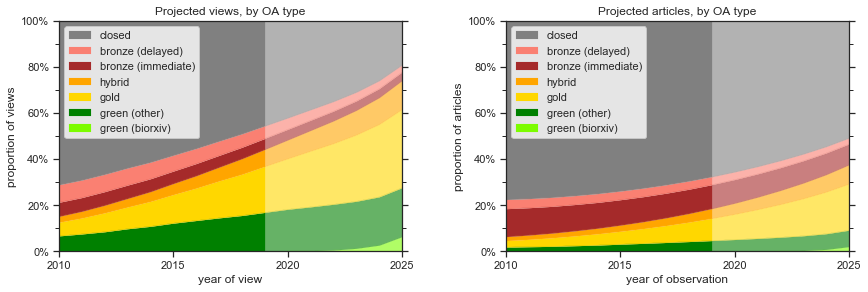

In [79]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=False)
plt.tight_layout(pad=0, w_pad=2, h_pad=1)
plt.subplots_adjust(hspace=1)

start_year = 2000
end_year = 2025
divide_year = 2018
xlabel="year of observation"
my_colors = graph_type_colors_plus_biorxiv
my_color_order = graph_type_order_plus_biorxiv
color_column = "graph_type"
fancy = None # "diff"

all_data_pivot = articles_by_obs_year_df_plus_biorxiv.pivot_table(
             index='x', columns=color_column, values=['y'], aggfunc=np.sum)\
       .sort_index(axis=1, level=1)\
       .swaplevel(0, 1, axis=1)
all_data_pivot.columns = all_data_pivot.columns.levels[0]

all_data_pivot_graph = all_data_pivot
if fancy == "diff":
    all_data_pivot_graph = all_data_pivot_graph.diff()
all_data_pivot_graph = all_data_pivot_graph.loc[all_data_pivot_graph.index > 1950]
all_data_pivot_graph = all_data_pivot_graph.loc[all_data_pivot_graph.index <= end_year]

df_diff_proportional = all_data_pivot_graph.div(all_data_pivot_graph.sum(1), axis=0)
all_data_pivot_actual = df_diff_proportional.loc[all_data_pivot_graph.index <= divide_year+1]
my_plot = all_data_pivot_actual[my_color_order].plot.area(stacked=True, color=my_colors, linewidth=.1,  ax=ax1)
all_data_pivot_projected = df_diff_proportional.loc[all_data_pivot_graph.index > divide_year]
my_plot = all_data_pivot_projected[my_color_order].plot.area(stacked=True, color=my_colors, linewidth=.1,  ax=ax1, alpha=0.6)
my_plot.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
ax1.set_xlabel(xlabel)
ax1.set_ylabel('proportion of articles')
#     ax2.set_title("Proportion of papers");
ax1.set_xlim(start_year, end_year)
ax1.set_ylim(0, 1)  
ax1.minorticks_on()
ax1.tick_params(axis='x', which='minor', bottom=False)
ax1.tick_params(which='both', right='on', left='on')
ax1.yaxis.set_minor_locator(plt.MaxNLocator(10))
ax1.set_title("Projected articles, by OA type")
handles, labels = my_plot.get_legend_handles_labels(); my_plot.legend(reversed(handles[0:7]), reversed(plus_biorxiv_labels[0:7]), loc='upper left');  # reverse to keep order consistent

    
df_diff_proportional_plus_biorxiv_proportional_actual = df_diff_proportional_plus_biorxiv.loc[df_diff_proportional_plus_biorxiv.index <= divide_year+1]
my_plot = df_diff_proportional_plus_biorxiv_proportional_actual[graph_type_order_plus_biorxiv].plot.area(stacked=True, color=graph_type_colors_plus_biorxiv, ax=ax2, linewidth=0.1)
df_diff_proportional_plus_biorxiv_proportional_projected = df_diff_proportional_plus_biorxiv.loc[df_diff_proportional_plus_biorxiv.index > divide_year]
my_plot = df_diff_proportional_plus_biorxiv_proportional_projected[my_color_order].plot.area(stacked=True, color=my_colors, linewidth=.1,  ax=ax2, alpha=0.6)
my_plot.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
ax2.set_xlabel('year of view')
ax2.set_ylabel('proportion of views')
ax2.set_xlim(2010, 2025)
ax2.set_ylim(0, 1)
ax2.minorticks_on()
ax2.tick_params(axis='x', which='minor', bottom=False)
ax2.tick_params(which='both', right='on', left='on')
ax2.yaxis.set_minor_locator(plt.MaxNLocator(10))
ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_title("Projected views, by OA type")
handles, labels = my_plot.get_legend_handles_labels(); my_plot.legend(reversed(handles[0:7]), reversed(plus_biorxiv_labels[0:7]), loc='upper left');  # reverse to keep order consistent

plt.tight_layout(pad=.5, w_pad=4, h_pad=2.0) 
plt.subplots_adjust(hspace=1)


Papers:

In [80]:

df = df_diff_proportional.copy()
rows = df.loc[(df.index==2010) | (df.index==2019) | (df.index==2025)]
rows["all OA"] = 1 - rows["closed"]
my_markdown = tabulate(100*rows[graph_type_order_plus_biorxiv+["all OA"]], tablefmt="pipe", headers="keys", floatfmt=",.0f")
display(Markdown(my_markdown))


|    x |   biorxiv |   green |   gold |   hybrid |   immediate_bronze |   delayed_bronze |   closed |   all OA |
|-----:|----------:|--------:|-------:|---------:|-------------------:|-----------------:|---------:|---------:|
| 2010 |       nan |       2 |      3 |        2 |                 12 |                4 |       78 |       22 |
| 2019 |         0 |       5 |     10 |        4 |                 10 |                3 |       68 |       32 |
| 2025 |         2 |       7 |     20 |        8 |                  9 |                3 |       51 |       49 |

Views:

In [96]:

df = df_diff_proportional_plus_biorxiv
rows = df.loc[(df.index==2010) | (df.index==2019) | (df.index==2025)]
# with pd.option_context('display.float_format', '{:,.0f}%'.format):
#     print 100*rows[graph_type_order_plus_biorxiv]

rows["all OA"] = 1 - rows["closed"]
my_markdown = tabulate(100*rows[graph_type_order_plus_biorxiv+["all OA"]], tablefmt="pipe", headers="keys", floatfmt=",.0f")
display(Markdown(my_markdown))


|   observation_year |   biorxiv |   green |   gold |   hybrid |   immediate_bronze |   delayed_bronze |   closed |   all OA |
|-------------------:|----------:|--------:|-------:|---------:|-------------------:|-----------------:|---------:|---------:|
|               2010 |       nan |       7 |      6 |        3 |                  6 |                8 |       71 |       29 |
|               2019 |         0 |      17 |     20 |        7 |                  5 |                5 |       46 |       54 |
|               2025 |         6 |      21 |     34 |       13 |                  4 |                3 |       25 |       75 |

---------------

## 5. Discussion



We estimate that by 2025, 76% of all article views will be to OA articles, and 49% of journal articles will be available as OA.  This represents rapid growth in OA: in 2019 54% of article views are to OA articles, and 32% of journal articles are OA.

Our model is conservative.  Although the extrapolations assume continued incremental adoption of OA, and explicitly include the growth of bioRxiv, they do not yet model other disruptive changes that will likely increase the growth of OA in coming years: the adoption of Plan S, a change in embargo periods for existing mandates, a dramatic increase in institutional self-archiving, large scale read and publish agreements, etc.

This area is ripe for future research in other ways as well: understanding how OA rates vary by discipline, country, and publisher is key.  The model could be refined in many ways, for example to use custom viewership patterns for readers within a specific university, or of a specific journal.

The study has several limitations.  Only journal articles with DOIs are included, which under-represents disciplines and geographical areas which rely heavily on conference papers or articles without DOIs.  Illegal repositories (SciHub) or articles posted on academic social networks (ResearchGate and Academia.edu) are not considered, which may undercount articles that relevant for some uses.  The users of the Unpaywall browser extension may not be representative of other readers, and using page views as a proxy for article interest is inexact.  Nonetheless, we believe this analysis represents a useful approach for modeling the growth and importance of OA in the future.  

The genesis for this study was a steady stream of inquiries from university librarians, asking for OA rates for specific journals to help inform their subscription decisions and negotiations.  We realized it would be even more helpful if we could provide OA rates (a) for the future, (b) by date when the OA resource is available, and (c) weighted by the importance of the article to their faculty.  The model presented here addresses these issues, and will form the basis of information available to librarians and other decision-makers in the future.


## 6. References

- Abdill, R.J., and Blekhman, R. (2019). Tracking the popularity and outcomes of all bioRxiv preprints. eLife 8.

- Antelman, K. (2017). Leveraging the growth of open access in library collection decision making. At the Helm: Leading Transformation. Association of College and Research Libraries 411–422.

- Laakso, M., and Björk, B.-C. (2013). Delayed open access: An overlooked high-impact category of openly available scientific literature. Journal of the American Society for Information Science and Technology 64, 1323–1329.

- Lewis, D.W. (2012). The Inevitability of Open Access. College & Research Libraries 73, 493–506.

- Piwowar, H., Priem, J., Larivière, V., Alperin, J.P., Matthias, L., Norlander, B., Farley, A., West, J., and Haustein, S. (2018). The state of OA: a large-scale analysis of the prevalence and impact of Open Access articles. PeerJ 6, e4375.



## 7. Data and code availability


### 7.1 Empirical Gold OA list

For now:  https://docs.google.com/spreadsheets/d/1bXeW6O2x_Jcy_NSri_BfLTvDZIPPf7S1bHkBIQm0G0c/edit?usp=sharing


### 7.2 Empirical bronze delayed OA list

clean empirical list:
https://docs.google.com/spreadsheets/d/1_Ts-4cmbgo1w0o5slP1xnLT4mKFz26LIokS9UUhojzI/edit#gid=1865704084

policies:
https://docs.google.com/spreadsheets/d/1c2jMSQr8L_rwG5OpxsbdVqL7R7G1NRODD35I_nh4vCE/edit#gid=2091057127

### 7.3 Study data

**HEATHER to do: save all sql data variables into files, upload to Zenodo**

### 7.4 Analysis notebook

Viewable at https://nbviewer.jupyter.org/gist/hpiwowar/fec0ce1cbfd31185732c72210e9de769?flush_cache=true

Export using 
```jupyter nbconvert manuscript.ipynb --to html_toc --TemplateExporter.exclude_input=True```
then can be viewed at
https://htmlpreview.github.io/?https://github.com/Impactstory/predicting-oa-paper/blob/master/manuscript.html

or a certain commit like https://htmlpreview.github.io/?https://github.com/Impactstory/predicting-oa-paper/blob/b694a19236a66f61ca39df9ab7198086f4b51680/manuscript.html

In Binder (note you won't be able to run it because live database connection is not public.  See [Study data](#Study-data) sections above for access to data.) https://hub.gke.mybinder.org/user/impactstory-predicting-oa-paper-zlndhusv/notebooks/manuscript.ipynb

## 8. Competing Interests

The authors work at [Our Research](https://ourresearch.org/) (formerly Impactstory), a non-profit company that builds tools to make scholarly research more open, connected, and reusable, including Unpaywall.

## 9. Funding


The authors received no funding for this analysis.

## 10. Acknowledgements

Acknowledgements go here

## 11. Supplementary Information


### 11.1 Detailed look at OA Lag of Green OA


In [82]:
register_new_figure("detailed-green");


We can explore the delay between the time an article is published and when it becomes available as Green OA by comparing publication dates with dates of repository availability, available from each article's OAI-PMH record (as harvested by Unpaywall).

We plot the number of Green OA papers made available each year in the graph below, vs their date of publication. The first plot is a histogram of number of papers made available each year (one row for each year). The second plot is the same, but superimposes the articles made available in previous years. This stacked area represents the total cumulative number of Green OA papers that are available in that year -- if you were in that year and wondering what was available as Green OA that's what you'd find.

The third plot is a larger version of the availability as of 2018, showing the accumulation of availability. It allows us to appreciate that less than half of papers papers published in, say, 2015, were made available the same year -- most of the papers have been made available in subsequent years. The fourth plot is a slice in isolation, for clarity: the Green OA for articles with a Publication Date of 2015.


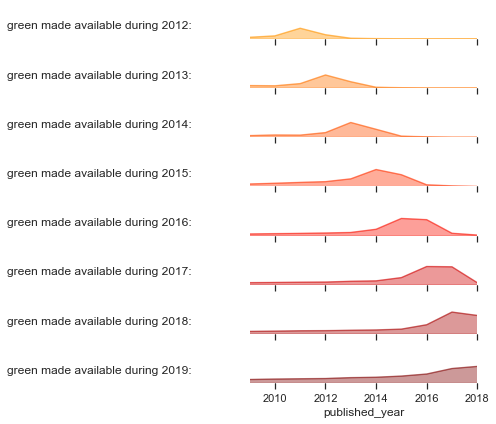

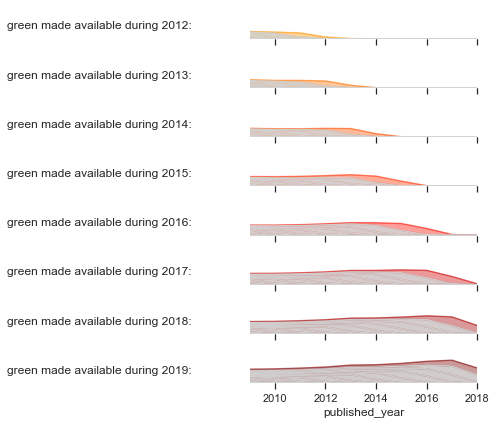

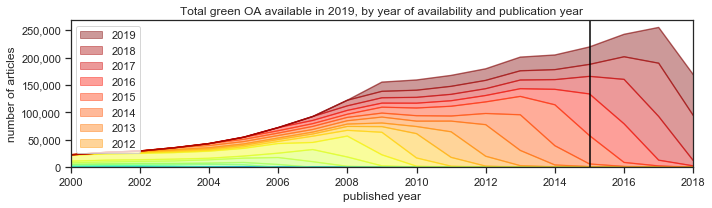

In [83]:
make_detailed_plots("green")

**{{print figure_link("detailed-green")}}: Detailed Green OA**

[could use clearer separation but figure labels will probably fix this]

[labels should change from "made available" to "available]

[normalize the y-axis differently, so these graph doesn't looks smaller?]


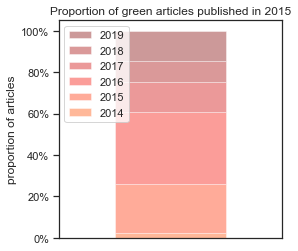

In [84]:
register_new_figure("zoom-in-green")
make_zoom_in_plot("green")

**{{print figure_link("zoom-in-green")}}: Zoom in green**

### 11.2 Detailed look at OA Lag of Bronze OA 

In [85]:
register_new_figure("detailed-bronze");

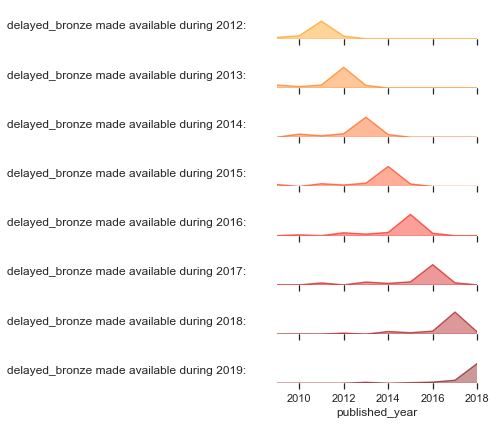

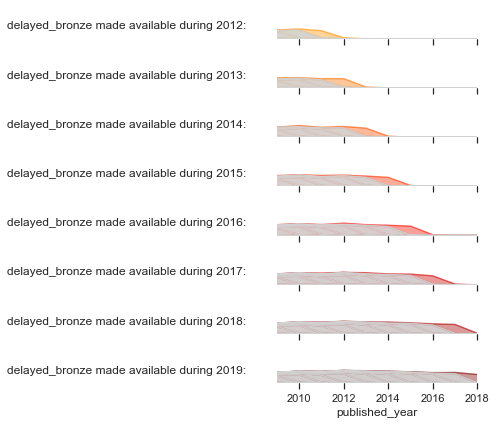

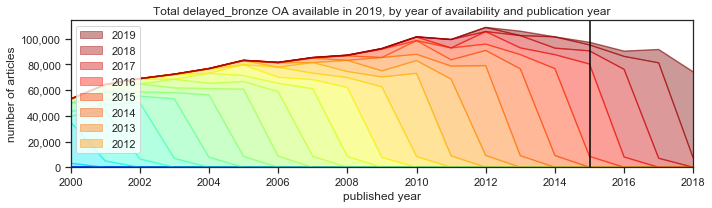

In [86]:
make_detailed_plots("delayed_bronze")

**{{print figure_link("detailed-bronze")}}: Detailed Bronze Delayed OA**

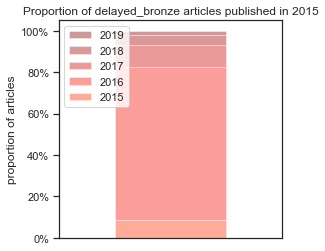

In [87]:
register_new_figure("zoom-in-bronze");
make_zoom_in_plot("delayed_bronze")

**{{print figure_link("zoom-in-bronze")}}: Zoom in bronze**

### 11.3 Walk-through of convolution



To show how we'll estimate views, we'll use 2022 as an example. We use the 2022 row from the give above, and the graph it by age of article (rather than year of publication). This flips the direction of the x axis. In this graph to make the next steps more clear we also use a shared y axis across all OA types.


In [88]:
register_new_figure('num-articles-2022');

loading cached value for variable 'papers_by_availability_year_total_2022'. Time since pickling  20:22:41.649568


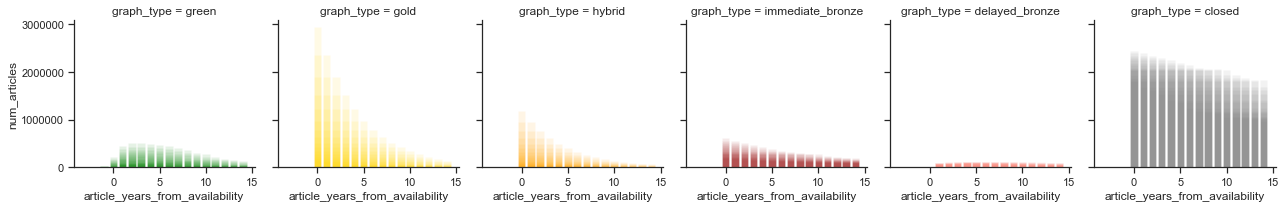

In [89]:

my_year = 2022
%cache papers_by_availability_year_total_2022 = get_papers_by_availability_year_total(my_year)  
data_now = papers_by_availability_year_total_2022.loc[papers_by_availability_year_total_2022["article_years_from_availability"] < 15]
data_now["publication_year"] = my_year - data_now["article_years_from_availability"]
g = sns.FacetGrid(data_now, col="graph_type", hue="graph_type", col_order=graph_type_order, hue_order=graph_type_order, palette=my_cmap_graph_type)
kws = dict(alpha=0.1)
g.map(plt.bar, "article_years_from_availability", "num_articles", **kws);



**{{print figure_link("num-articles-2022")}}: Papers by year of publication, exponential extrapolation**

Next, we'll use the signal we calculated in the section "How often does someone want to access a paper, given its age and OA type", which shows the number of views per article someone made in 2019. An assumption in our model is that this views-per-article probability stays the same across time, so we assume that it applies to 2022 as well.


In [90]:
register_new_figure("views-per-article2");

loading cached value for variable 'views_per_article_total'. Time since pickling  22:18:57.414446


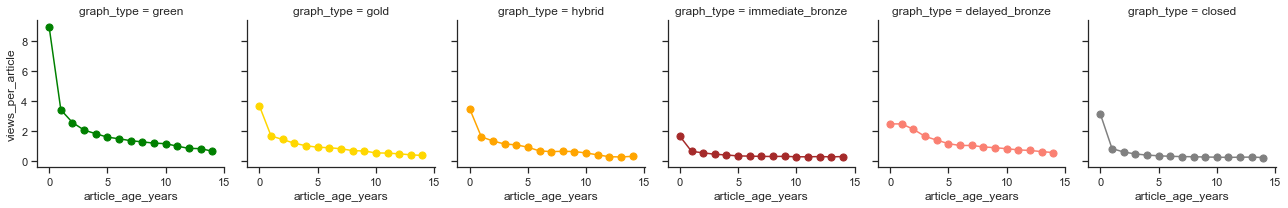

In [91]:

%cache views_per_article_total = get_views_per_article_total()  
data_now = views_per_article_total.loc[views_per_article_total["article_age_years"] >= 0]
g = sns.FacetGrid(data_now, col="graph_type", hue="graph_type", col_order=graph_type_order, hue_order=graph_type_order, palette=my_cmap_graph_type)
kws = dict(s=50)
g.map(plt.scatter, "article_age_years", "views_per_article", **kws);
g.map(plt.plot, "article_age_years", "views_per_article");


**{{print figure_link("views-per-article2")}}: Papers by year of publication, exponential extrapolation**

Now we multiply these two signals together. We multiply them in a similar way that we divided signals in an earlier step -- we take each OA type in turn, and then take each age bin in turn. So the green OA point at 0 years in the graph below comes by multiplying the number of estimated articles in 2022 that are available as green OA and 0 years old by the number of "views-per-article" we calculated for green OA for articles that are 0 years old. We then do that calculation for every age bin, for every OA type, and get the graph below:


In [92]:
register_new_figure("views-by-article-year-2022");

loading cached value for variable 'predicted_views_by_pubdate_total'. Time since pickling  20:21:37.516303


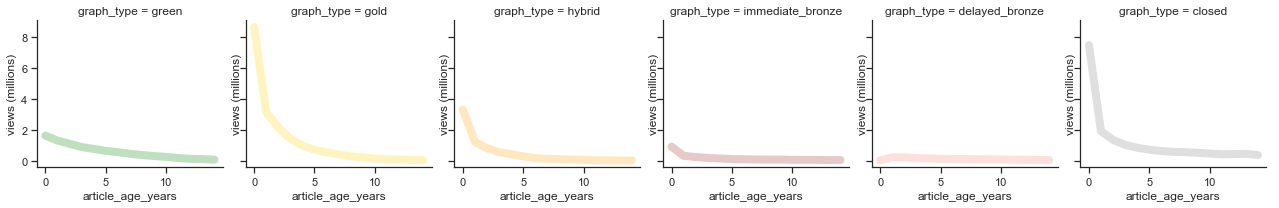

In [93]:

%cache predicted_views_by_pubdate_total = get_predicted_views_by_pubdate_total(my_year) 
data_now = predicted_views_by_pubdate_total.loc[predicted_views_by_pubdate_total["article_age_years"] < 15]
g = sns.FacetGrid(data_now, col="graph_type", hue="graph_type", col_order=graph_type_order, hue_order=graph_type_order, palette=my_cmap_graph_type)
kws = dict(alpha=0.25, linewidth=8)
g.map(plt.plot, "article_age_years", "views", **kws);
# kws = dict(alpha=1, linewidth=5, linestyle='dashed')
# g.map(plt.plot, "article_age_years", "views", **kws);
for ax in g.axes[0]:
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, pos: '{0:,.0f}'.format(y/(1000*1000.0))))
    ax.set_ylabel("views (millions)")

**{{print figure_link("views-by-article-year-2022")}}: Papers by year of publication, exponential extrapolation**